# Trabalho 2 - Linguagens de Programação - EEL670 - 21.2

## Bike Sharing Demand
Previsão de uso de um sistema de compartilhamento de bicicletas na cidade

Os sistemas de compartilhamento de bicicletas são uma forma de alugar bicicletas em que o processo de obtenção de associação, aluguel e devolução da bicicleta é automatizado por meio de uma rede de quiosques localizados em toda a cidade. Usando esses sistemas, as pessoas podem alugar uma bicicleta em um local e devolvê-la em outro conforme necessário. Atualmente, existem mais de 500 programas de compartilhamento de bicicletas em todo o mundo.

Os dados gerados por esses sistemas os tornam atraentes para pesquisadores, porque a duração da viagem, o local de partida, o local de chegada e o tempo decorrido são registrados explicitamente. Portanto, os sistemas de compartilhamento de bicicletas funcionam como uma rede de sensores, que podem ser usados para estudar a mobilidade em uma cidade. Nesta competição, os participantes são solicitados a combinar padrões históricos de uso com dados meteorológicos para prever a demanda por aluguel de bicicletas no programa Capital Bikeshare em Washington, D.C.

Foram recebidos dados de aluguel por hora abrangendo dois anos. Para esta competição, o conjunto de treinamento é composto pelos primeiros 19 dias de cada mês, enquanto o conjunto de testes é do dia 20 até o final do mês. Foi previsto o total de bicicletas alugadas durante cada hora coberta pelo conjunto de testes, usando apenas informações disponíveis antes do período de aluguel.

**Colunas do Dataset:**

- **datetime:** Data e hora por hora
- **season:** Estação do ano (1 = primavera, 2 = verão, 3 = outono, 4 = inverno)
- **holiday:** Se o dia é considerado feriado
- **workingday:** Se o dia não é nem fim de semana nem feriado
- **weather:**
  - **1:** Limpo, Poucas nuvens, Parcialmente nublado, Parcialmente nublado
  - **2:** Neblina + Nublado, Neblina + Nuvens quebradas, Neblina + Poucas nuvens, Neblina
  - **3:** Neve leve, Chuva leve + Trovoada + Nuvens dispersas, Chuva leve + Nuvens dispersas
  - **4:** Chuva forte + Pedras de gelo + Trovoada + Neblina, Neve + Neblina
- **temp:** Temperatura em Celsius
- **atemp:** Temperatura "sensação térmica" em Celsius
- **humidity:** Umidade relativa
- **windspeed:** Velocidade do vento
- **casual:** Número de aluguéis iniciados por usuários não registrados
- **registered:** Número de aluguéis iniciados por usuários registrados
- **count:** Número total de aluguéis

### 1. Importação das bibliotecas

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 2. Coleta dos dados

In [54]:
# train: dados de treino
train = pd.read_csv("bike-sharing-demand/train.csv")
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [55]:
# test: dados de teste
test = pd.read_csv("bike-sharing-demand/test.csv")
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

### 3. Tratamento dos dados

In [56]:
# Verificando a existência de valores null
train.isnull().sum()


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [57]:
# Verificando a existência de valores null
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [58]:
# Verificando a existência de valores nan
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [59]:
# Verificando a existência de valores nan
test.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [60]:
# Verificando os tipos das colunas
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [61]:
# Verificando os tipos das colunas
test.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object

In [62]:
train['datetime'] = pd.to_datetime(train['datetime'])

train['hour'] = train['datetime'].dt.hour
train['day_of_week'] = train['datetime'].dt.dayofweek
train['week_of_year'] = train['datetime'].dt.isocalendar().week
train['month'] = train['datetime'].dt.month
train['quarter'] = train['datetime'].dt.quarter
train['year'] = train['datetime'].dt.year

train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  hour  day_of_week  \
0        81        0.0       3          13     16     0            5   
1        80        0.0       8          32     40     1            5   
2        80        0.0       5          27     32     2            5   
3        75        0.0       3          10     13     3            5   
4        75        0.0       0           1      1     4            5   

   week_of_year  month  quarter  year  
0            52      1        1  2011  
1            52      1        1  2011  
2            52      1        1  2011  
3            52      1        1  2011  
4            52      1        1  2011

In [63]:
test['datetime'] = pd.to_datetime(test['datetime'])

test['hour'] = test['datetime'].dt.hour
test['day_of_week'] = test['datetime'].dt.dayofweek
test['week_of_year'] = test['datetime'].dt.isocalendar().week
test['month'] = test['datetime'].dt.month
test['quarter'] = test['datetime'].dt.quarter
test['year'] = test['datetime'].dt.year

test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  hour  day_of_week  week_of_year  month  quarter  year  
0        56    26.0027     0            3             3      1        1  2011  
1        56     0.0000     1            3             3      1        1  2011  
2        56     0.0000     2            3             3      1        1  2011  
3        56    11.0014     3            3             3      1        1  2011  
4        56    11.0014     4            3             3      1        1  2011

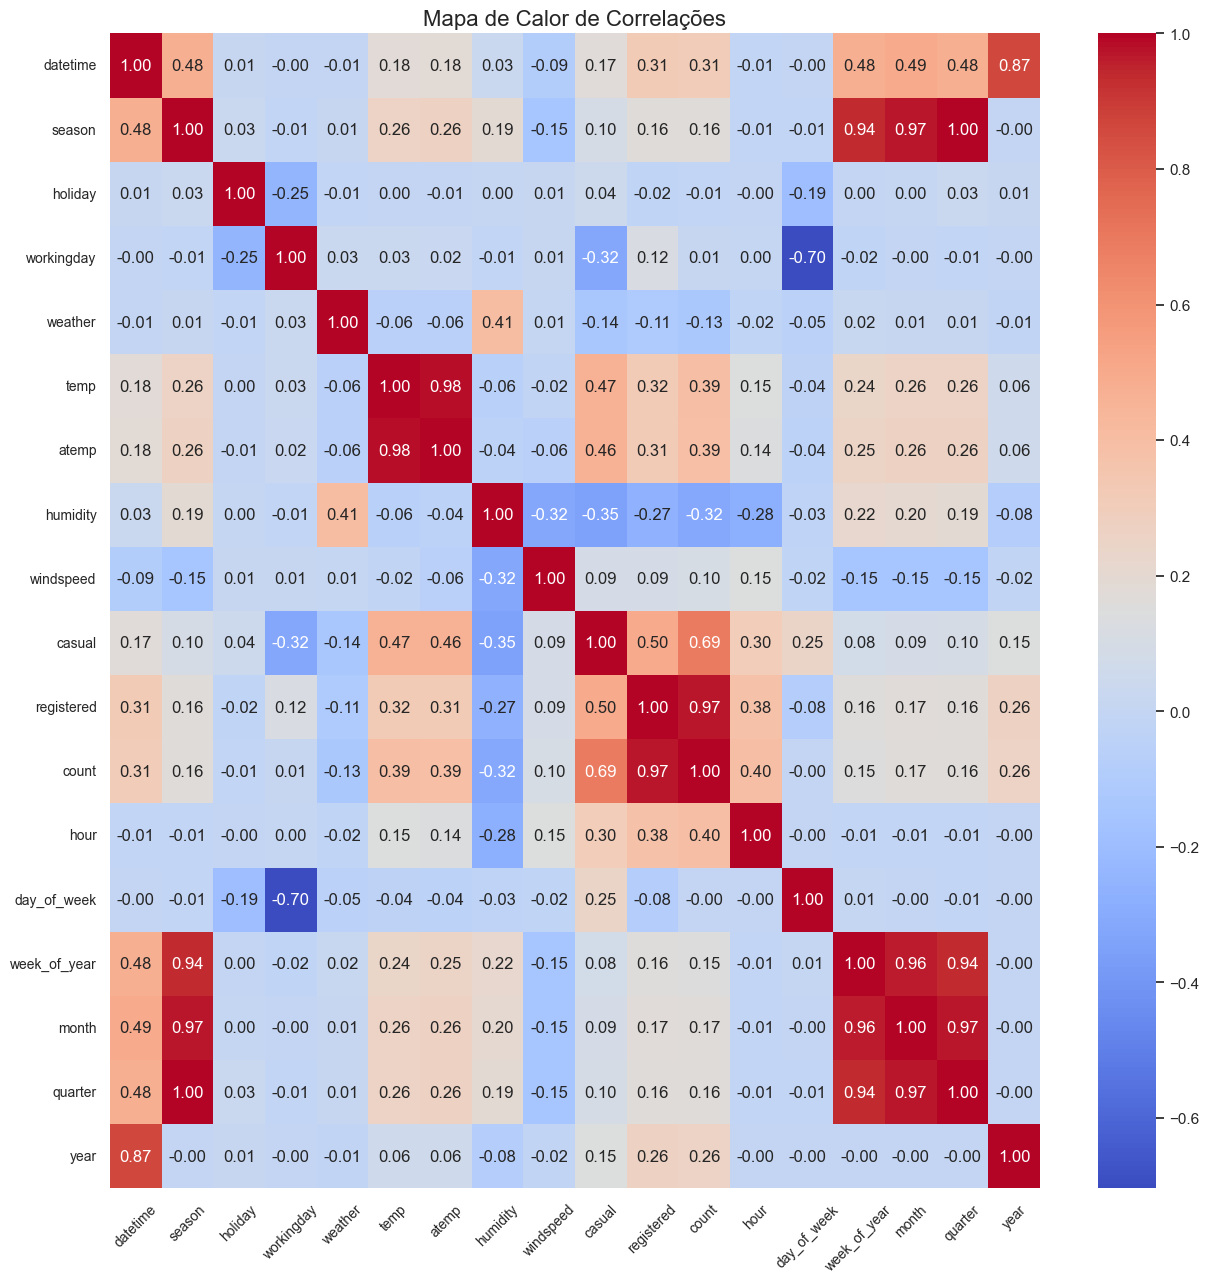

In [64]:

# Calcular as correlações
correlacao = train.corr()

# Ajustar o tamanho da figura
plt.figure(figsize=(15, 15))

# Criar o heatmap com anotações e personalizações
heatmap = sns.heatmap(data=correlacao, annot=True, fmt=".2f", cmap='coolwarm')

# Aumentar o tamanho das fontes dos valores de correlação
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)

# Adicionar título
plt.title('Mapa de Calor de Correlações', fontsize=16)

# Rotacionar os rótulos dos eixos
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar o gráfico
plt.show()

### 4. Análise dos dados

In [65]:
train_description_rounded = train.describe()

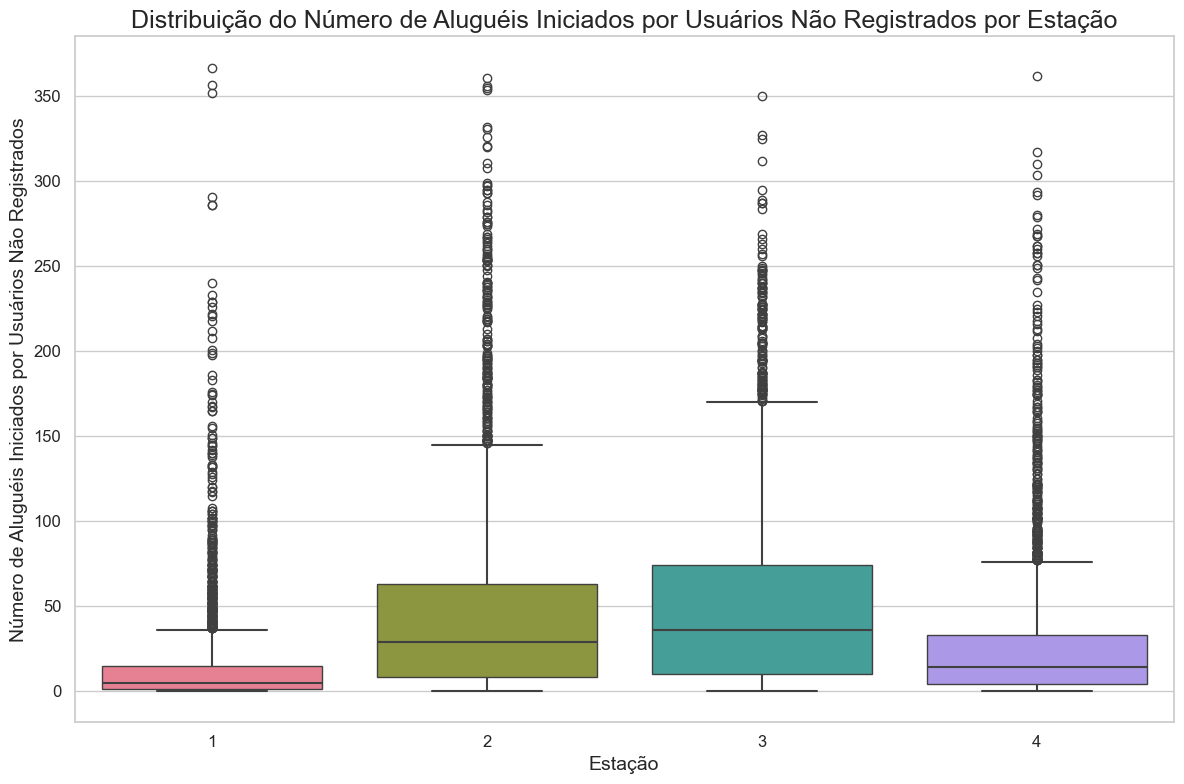

In [66]:
# Ajuste do tamanho da figura
plt.figure(figsize=(12, 8))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 4)

# Boxplot
sns.boxplot(x="season", y="casual", data=train, hue="season", palette=palette)

# Título e rótulos dos eixos com ajustes de tamanho de fonte e texto explicativo
plt.title('Distribuição do Número de Aluguéis Iniciados por Usuários Não Registrados por Estação', fontsize=18)
plt.xlabel('Estação', fontsize=14)
plt.ylabel('Número de Aluguéis Iniciados por Usuários Não Registrados', fontsize=14)

# Ajuste de tamanho de fonte para os rótulos dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuste de espessura das linhas dos boxplots
for line in plt.gca().get_lines():
    line.set_linewidth(1.5)

# Remover legendas duplicadas
plt.legend([],[], frameon=False)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

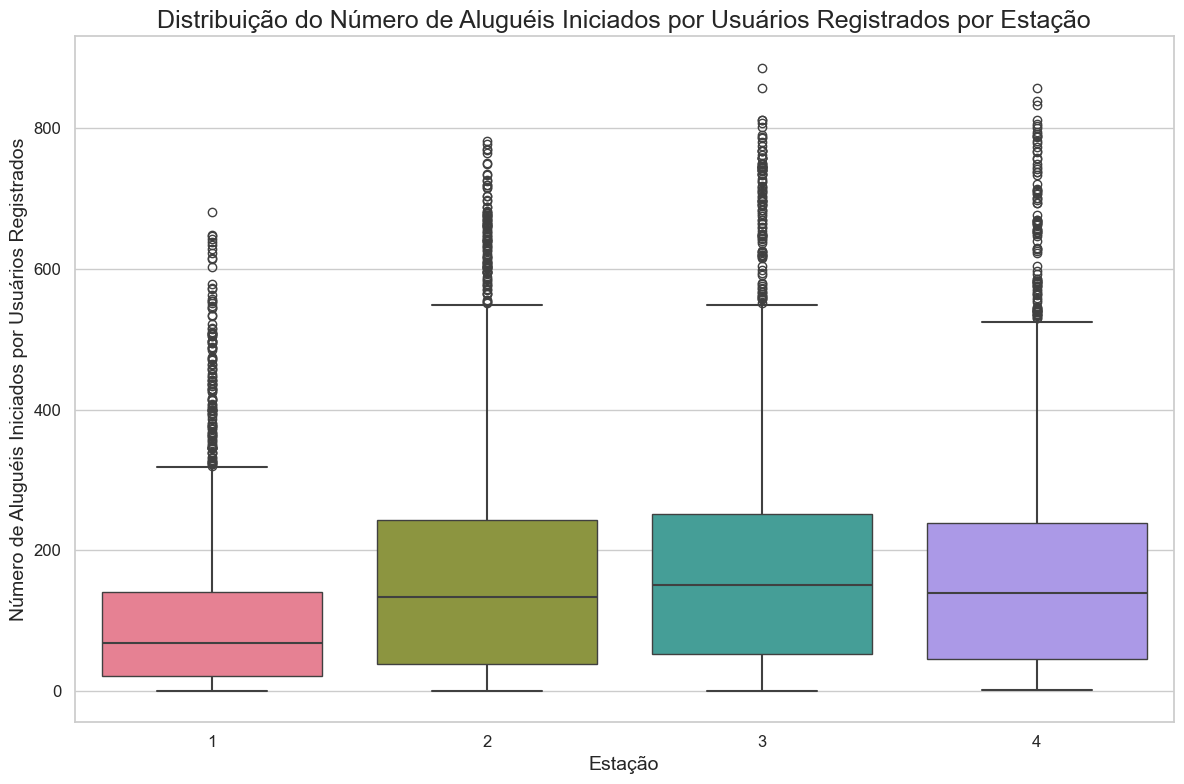

In [67]:
# Ajuste do tamanho da figura
plt.figure(figsize=(12, 8))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 4)

# Boxplot
sns.boxplot(x="season", y="registered", data=train, hue="season", palette=palette)

# Título e rótulos dos eixos com ajustes de tamanho de fonte
plt.title('Distribuição do Número de Aluguéis Iniciados por Usuários Registrados por Estação', fontsize=18)
plt.xlabel('Estação', fontsize=14)
plt.ylabel('Número de Aluguéis Iniciados por Usuários Registrados', fontsize=14)

# Ajuste de tamanho de fonte para os rótulos dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuste de espessura das linhas dos boxplots
for line in plt.gca().get_lines():
    line.set_linewidth(1.5)

# Remover legendas duplicadas
plt.legend([],[], frameon=False)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

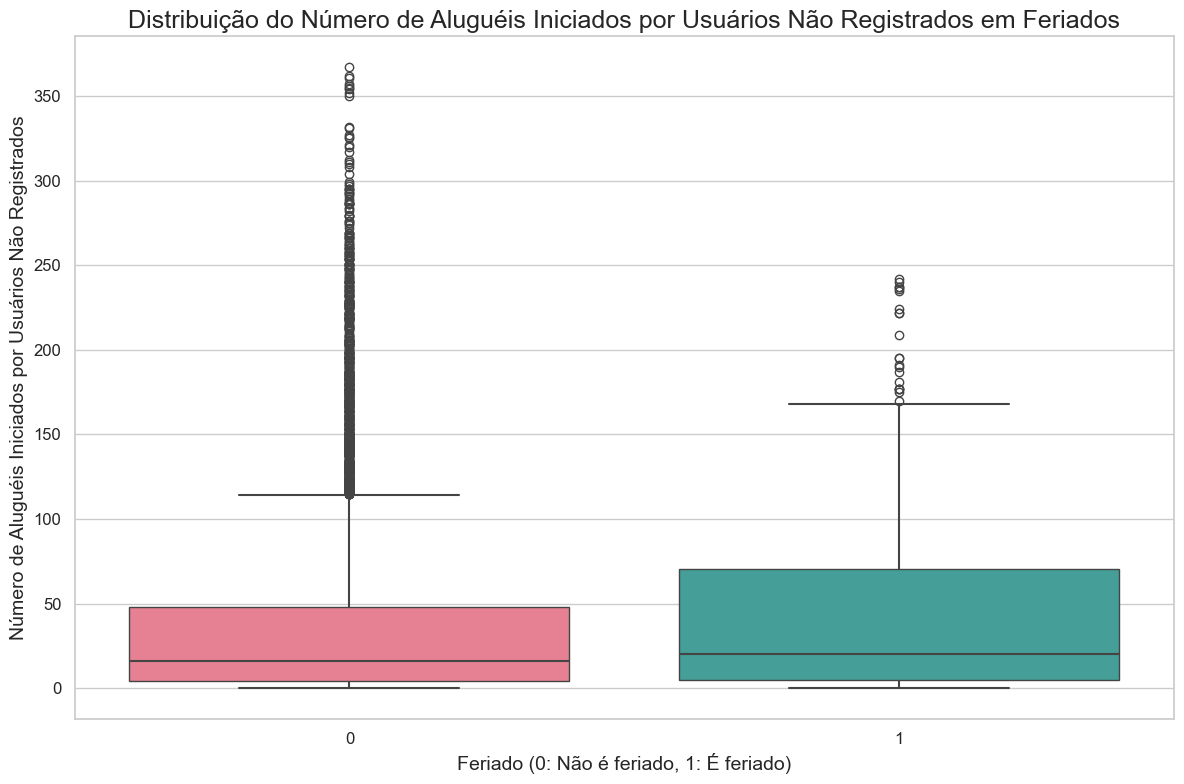

In [68]:
# Ajuste do tamanho da figura
plt.figure(figsize=(12, 8))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 2)

# Boxplot
sns.boxplot(x="holiday", y="casual", data=train, hue="holiday", palette=palette)

# Título e rótulos dos eixos com ajustes de tamanho de fonte e texto explicativo
plt.title('Distribuição do Número de Aluguéis Iniciados por Usuários Não Registrados em Feriados', fontsize=18)
plt.xlabel('Feriado (0: Não é feriado, 1: É feriado)', fontsize=14)
plt.ylabel('Número de Aluguéis Iniciados por Usuários Não Registrados', fontsize=14)

# Ajuste de tamanho de fonte para os rótulos dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuste de espessura das linhas dos boxplots
for line in plt.gca().get_lines():
    line.set_linewidth(1.5)

# Remover legendas duplicadas
plt.legend([],[], frameon=False)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()


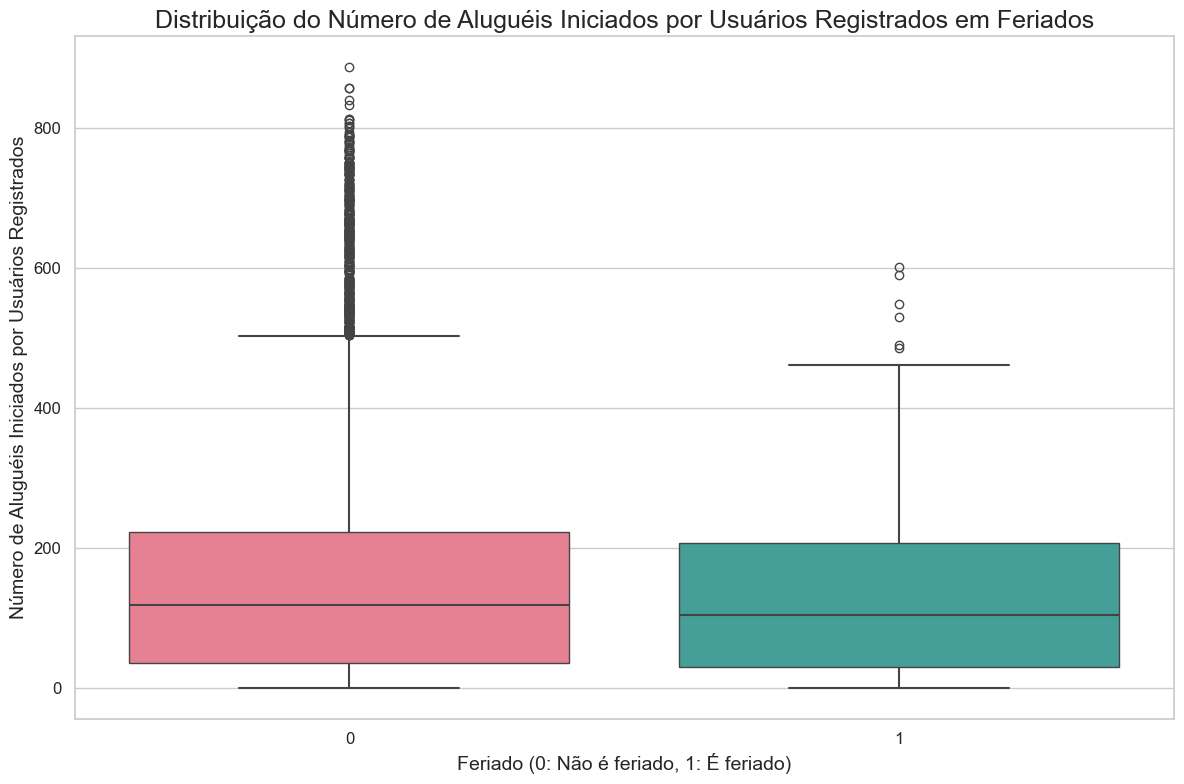

In [69]:
# Ajuste do tamanho da figura
plt.figure(figsize=(12, 8))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 2)

# Boxplot
sns.boxplot(x="holiday", y="registered", data=train, hue="holiday", palette=palette)

# Título e rótulos dos eixos com ajustes de tamanho de fonte e texto explicativo
plt.title('Distribuição do Número de Aluguéis Iniciados por Usuários Registrados em Feriados', fontsize=18)
plt.xlabel('Feriado (0: Não é feriado, 1: É feriado)', fontsize=14)
plt.ylabel('Número de Aluguéis Iniciados por Usuários Registrados', fontsize=14)

# Ajuste de tamanho de fonte para os rótulos dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuste de espessura das linhas dos boxplots
for line in plt.gca().get_lines():
    line.set_linewidth(1.5)

# Remover legendas duplicadas
plt.legend([],[], frameon=False)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

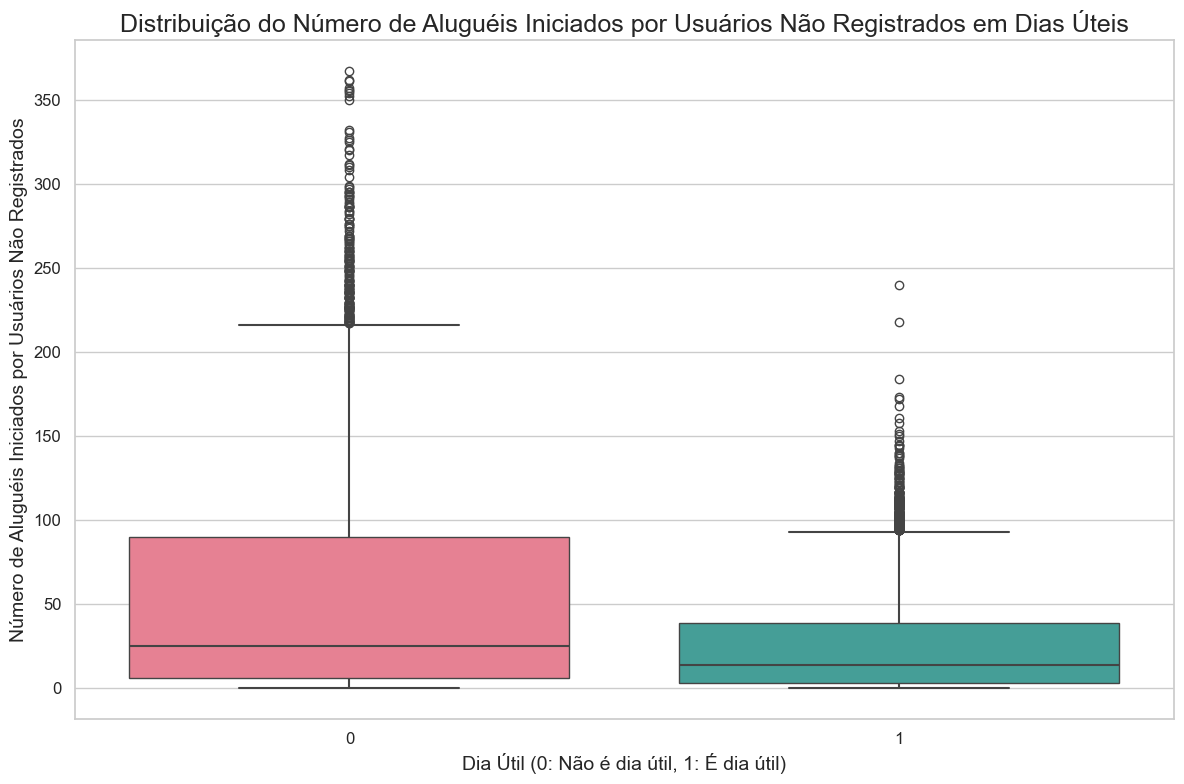

In [70]:
# Ajuste do tamanho da figura
plt.figure(figsize=(12, 8))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 2)

# Boxplot
sns.boxplot(x="workingday", y="casual", data=train, hue="workingday", palette=palette)

# Título e rótulos dos eixos com ajustes de tamanho de fonte e texto explicativo
plt.title('Distribuição do Número de Aluguéis Iniciados por Usuários Não Registrados em Dias Úteis', fontsize=18)
plt.xlabel('Dia Útil (0: Não é dia útil, 1: É dia útil)', fontsize=14)
plt.ylabel('Número de Aluguéis Iniciados por Usuários Não Registrados', fontsize=14)

# Ajuste de tamanho de fonte para os rótulos dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuste de espessura das linhas dos boxplots
for line in plt.gca().get_lines():
    line.set_linewidth(1.5)

# Remover legendas duplicadas
plt.legend([],[], frameon=False)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

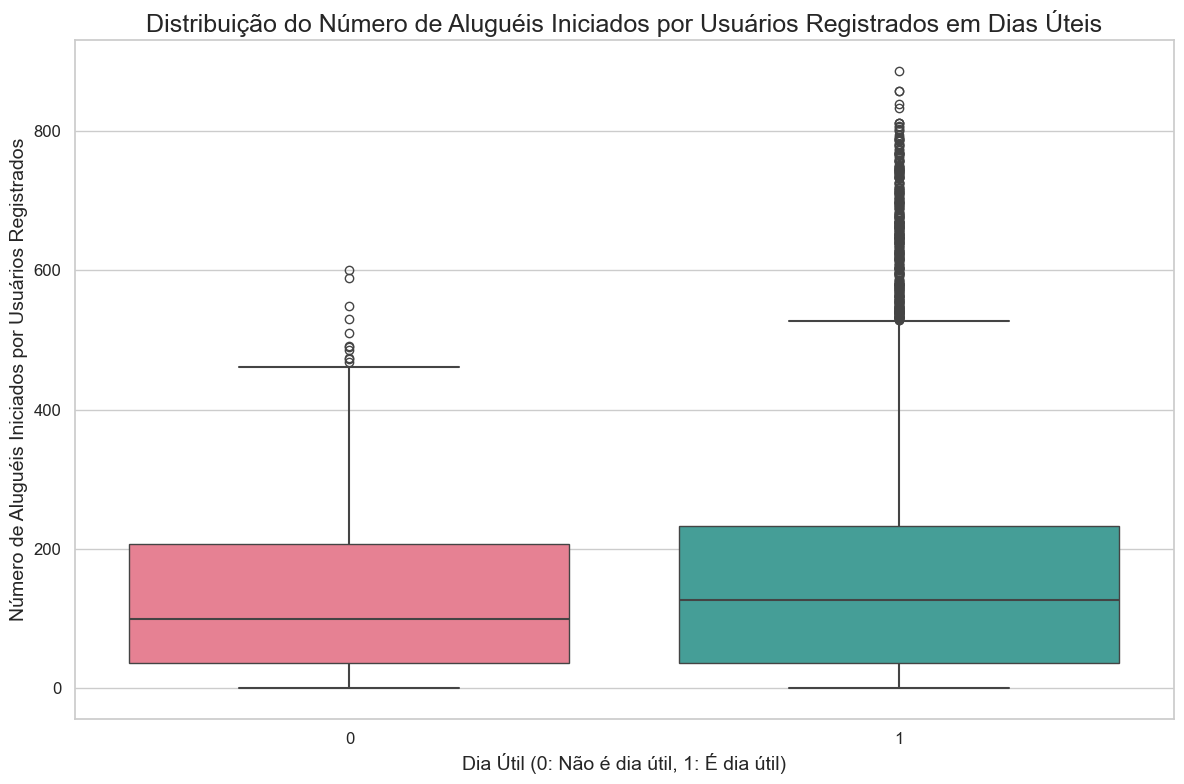

In [71]:
# Ajuste do tamanho da figura
plt.figure(figsize=(12, 8))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 2)

# Boxplot
sns.boxplot(x="workingday", y="registered", data=train, hue="workingday", palette=palette)

# Título e rótulos dos eixos com ajustes de tamanho de fonte e texto explicativo
plt.title('Distribuição do Número de Aluguéis Iniciados por Usuários Registrados em Dias Úteis', fontsize=18)
plt.xlabel('Dia Útil (0: Não é dia útil, 1: É dia útil)', fontsize=14)
plt.ylabel('Número de Aluguéis Iniciados por Usuários Registrados', fontsize=14)

# Ajuste de tamanho de fonte para os rótulos dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuste de espessura das linhas dos boxplots
for line in plt.gca().get_lines():
    line.set_linewidth(1.5)

# Remover legendas duplicadas
plt.legend([],[], frameon=False)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

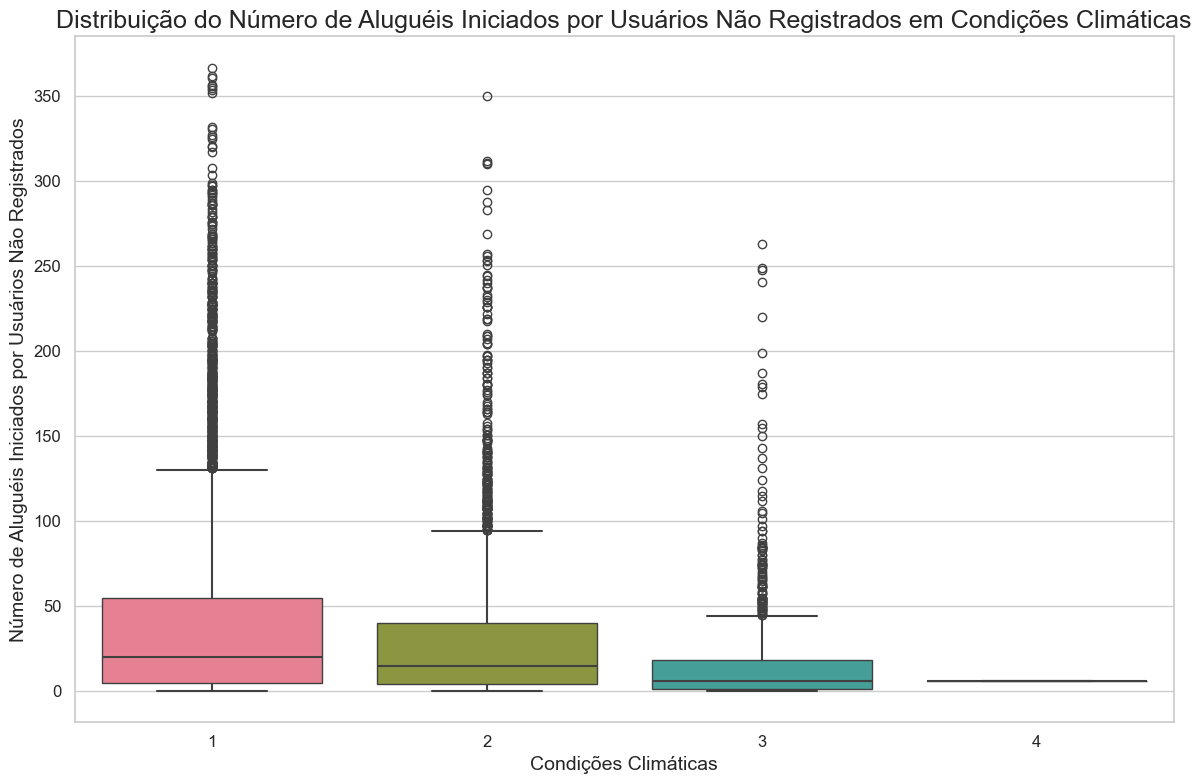

In [72]:
# Ajuste do tamanho da figura
plt.figure(figsize=(12, 8))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 4)

# Boxplot para casual
sns.boxplot(x="weather", y="casual", data=train, hue="weather", palette=palette)

# Título e rótulos dos eixos com ajustes de tamanho de fonte e texto explicativo
plt.title('Distribuição do Número de Aluguéis Iniciados por Usuários Não Registrados em Condições Climáticas', fontsize=18)
plt.xlabel('Condições Climáticas', fontsize=14)
plt.ylabel('Número de Aluguéis Iniciados por Usuários Não Registrados', fontsize=14)

# Ajuste de tamanho de fonte para os rótulos dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuste de espessura das linhas dos boxplots
for line in plt.gca().get_lines():
    line.set_linewidth(1.5)

# Remover legendas duplicadas
plt.legend([],[], frameon=False)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

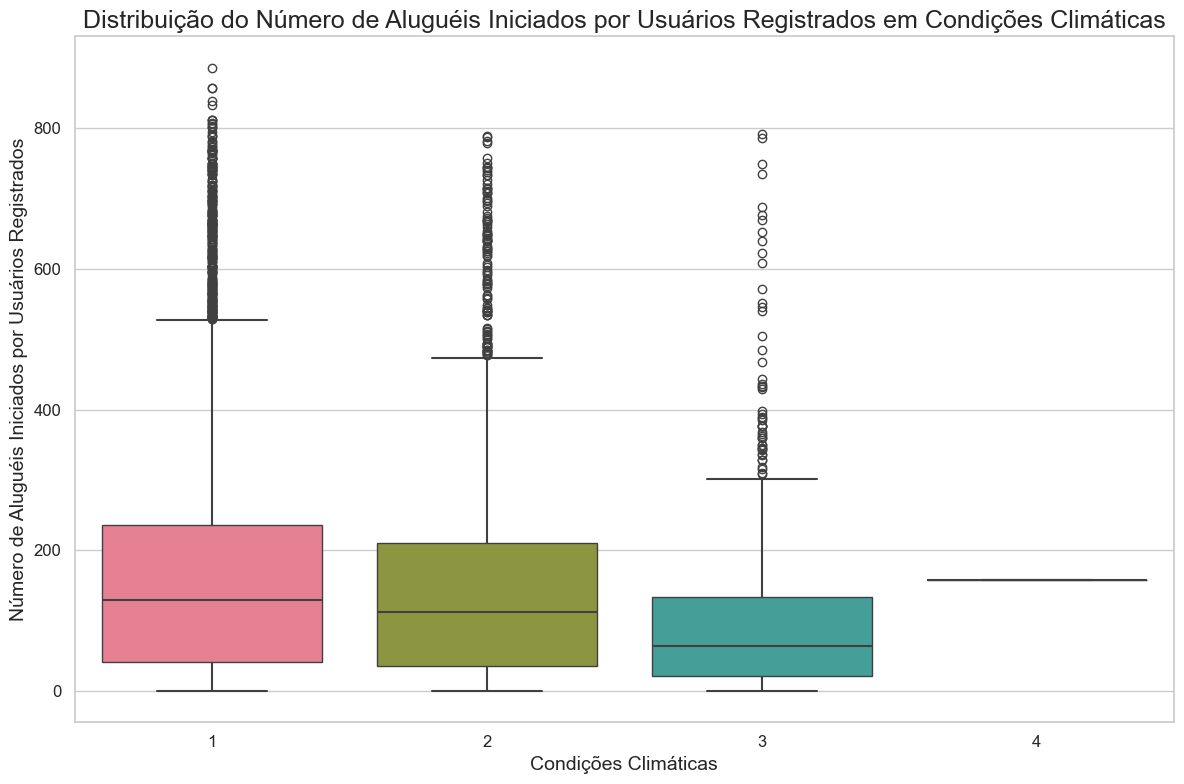

In [73]:
# Ajuste do tamanho da figura
plt.figure(figsize=(12, 8))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 4)

# Boxplot para registered
sns.boxplot(x="weather", y="registered", data=train, hue="weather", palette=palette)

# Título e rótulos dos eixos com ajustes de tamanho de fonte e texto explicativo
plt.title('Distribuição do Número de Aluguéis Iniciados por Usuários Registrados em Condições Climáticas', fontsize=18)
plt.xlabel('Condições Climáticas', fontsize=14)
plt.ylabel('Número de Aluguéis Iniciados por Usuários Registrados', fontsize=14)

# Ajuste de tamanho de fonte para os rótulos dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuste de espessura das linhas dos boxplots
for line in plt.gca().get_lines():
    line.set_linewidth(1.5)

# Remover legendas duplicadas
plt.legend([],[], frameon=False)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

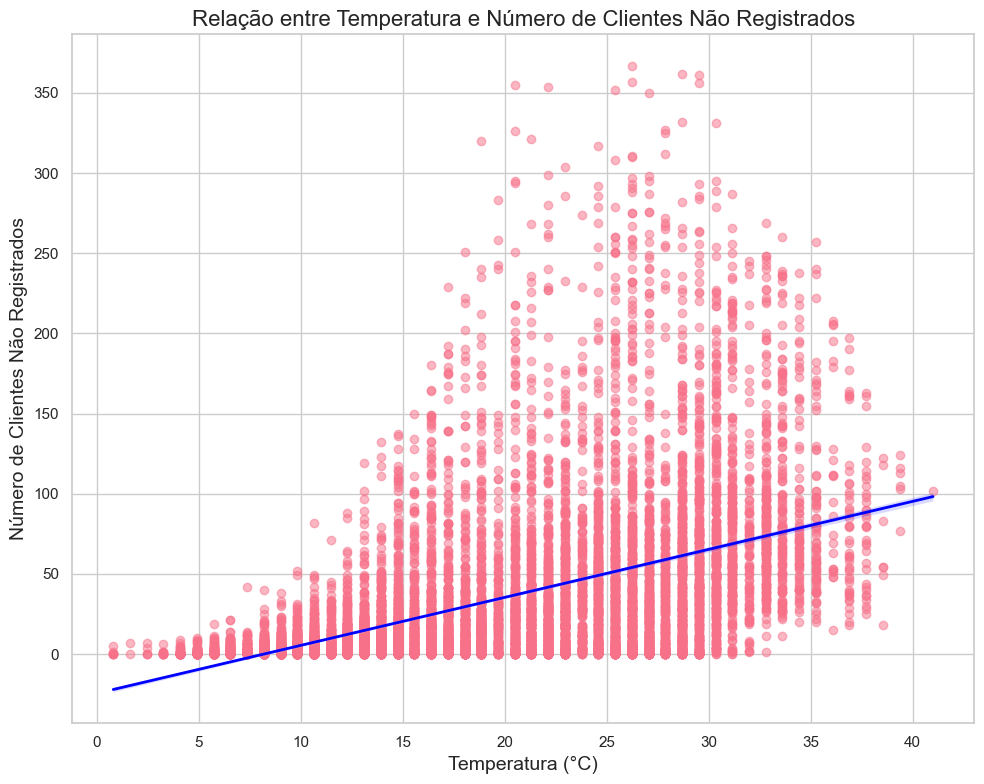

In [74]:
# Ajustando o estilo e paleta de cores do Seaborn
sns.set_theme(style="whitegrid")
sns.set_palette("husl")

# Criando o gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 8))
sns.regplot(data=train, x='temp', y='casual', scatter_kws={'alpha':0.5}, line_kws={'color':'blue', 'linewidth':2})
plt.title('Relação entre Temperatura e Número de Clientes Não Registrados', fontsize=16)
plt.xlabel('Temperatura (°C)', fontsize=14)
plt.ylabel('Número de Clientes Não Registrados', fontsize=14)

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

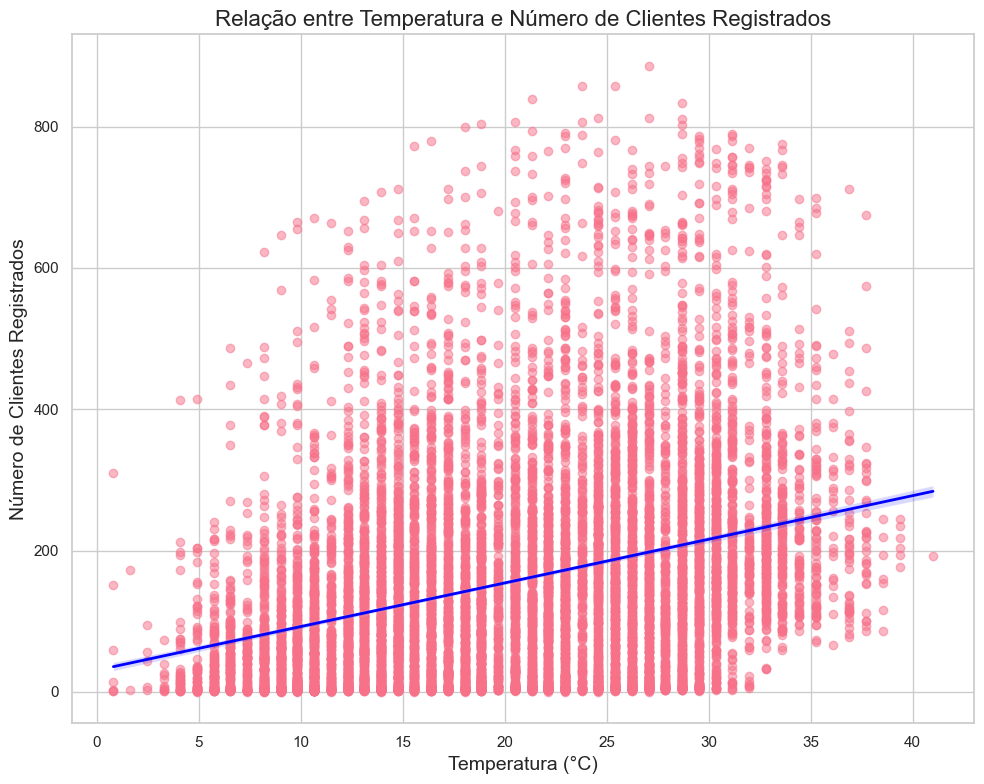

In [75]:
# Ajustando o estilo e paleta de cores do Seaborn
sns.set_theme(style="whitegrid")
sns.set_palette("husl")

# Criando o gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 8))
sns.regplot(data=train, x='temp', y='registered', scatter_kws={'alpha':0.5}, line_kws={'color':'blue', 'linewidth':2})
plt.title('Relação entre Temperatura e Número de Clientes Registrados', fontsize=16)
plt.xlabel('Temperatura (°C)', fontsize=14)
plt.ylabel('Número de Clientes Registrados', fontsize=14)

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

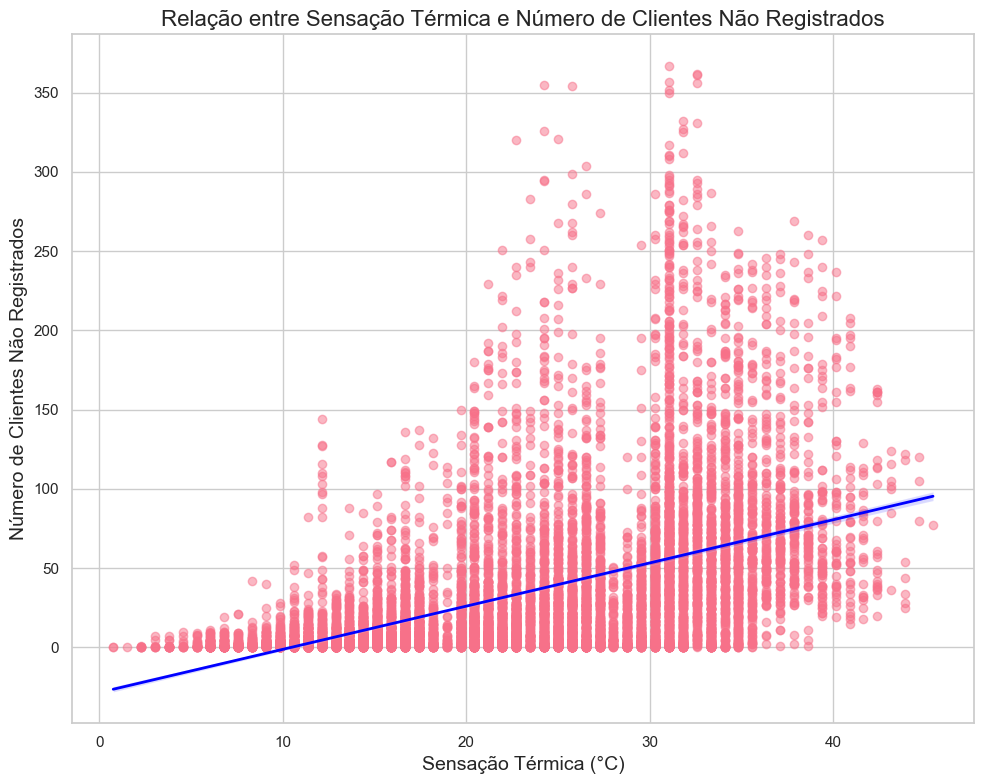

In [76]:
# Ajustando o estilo e paleta de cores do Seaborn
sns.set_theme(style="whitegrid")
sns.set_palette("husl")

# Criando o gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 8))
sns.regplot(data=train, x='atemp', y='casual', scatter_kws={'alpha':0.5}, line_kws={'color':'blue', 'linewidth':2})
plt.title('Relação entre Sensação Térmica e Número de Clientes Não Registrados', fontsize=16)
plt.xlabel('Sensação Térmica (°C)', fontsize=14)
plt.ylabel('Número de Clientes Não Registrados', fontsize=14)

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

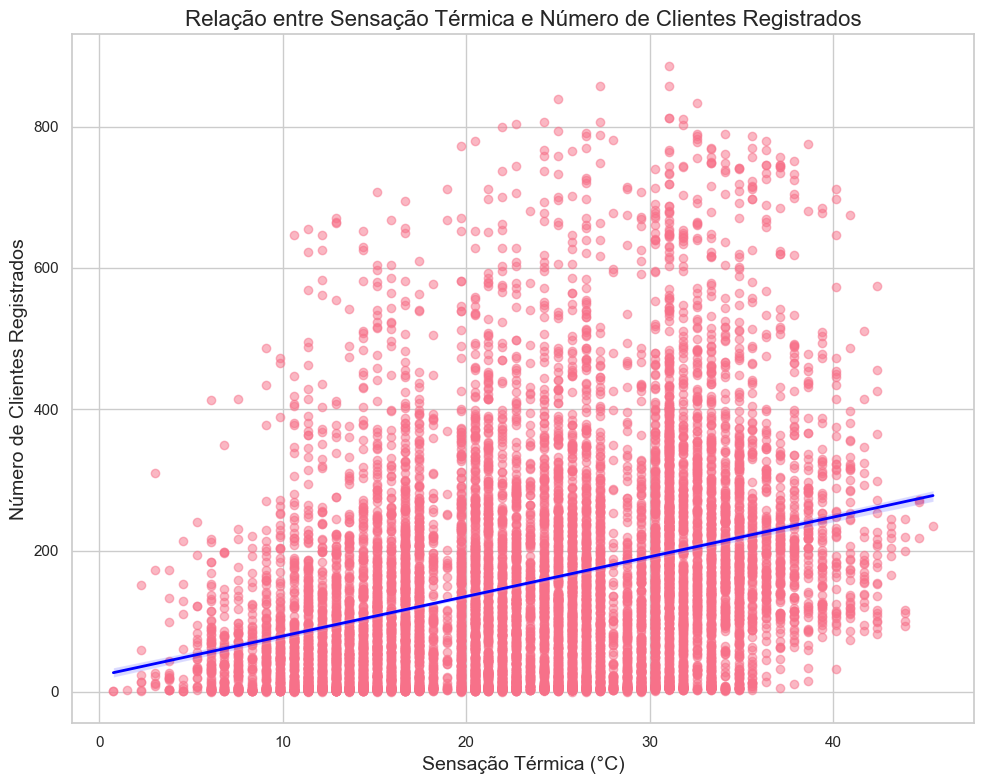

In [77]:
# Ajustando o estilo e paleta de cores do Seaborn
sns.set_theme(style="whitegrid")
sns.set_palette("husl")

# Criando o gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 8))
sns.regplot(data=train, x='atemp', y='registered', scatter_kws={'alpha':0.5}, line_kws={'color':'blue', 'linewidth':2})
plt.title('Relação entre Sensação Térmica e Número de Clientes Registrados', fontsize=16)
plt.xlabel('Sensação Térmica (°C)', fontsize=14)
plt.ylabel('Número de Clientes Registrados', fontsize=14)

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

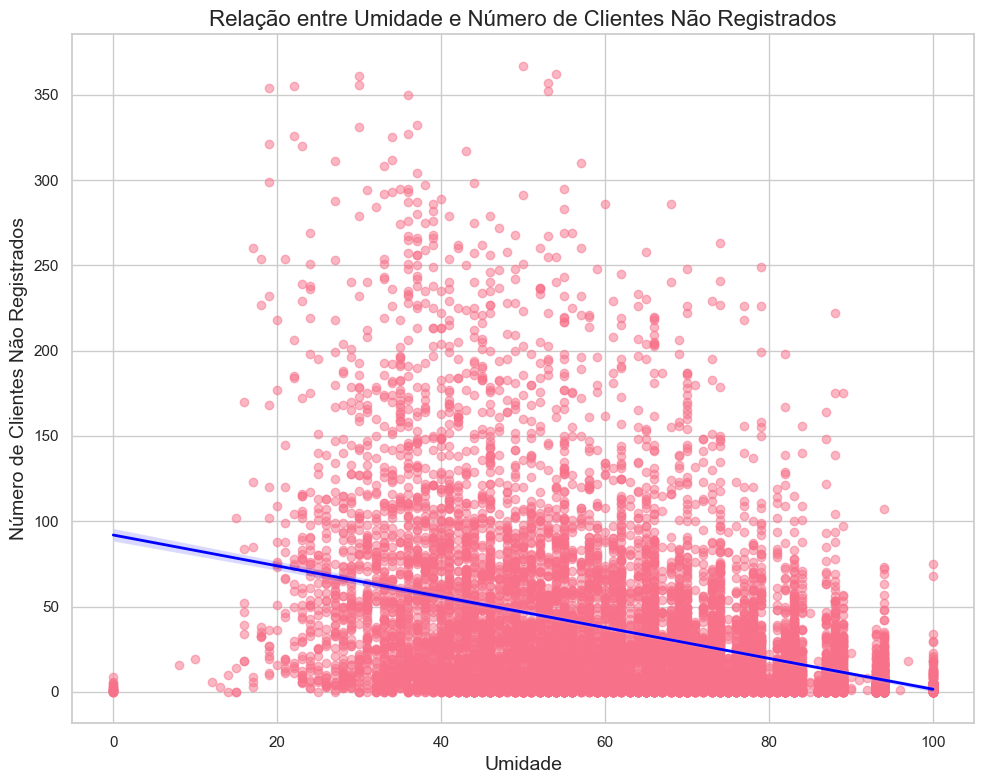

In [78]:
# Ajustando o estilo e paleta de cores do Seaborn
sns.set_theme(style="whitegrid")
sns.set_palette("husl")

# Criando o gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 8))
sns.regplot(data=train, x='humidity', y='casual', scatter_kws={'alpha':0.5}, line_kws={'color':'blue', 'linewidth':2})
plt.title('Relação entre Umidade e Número de Clientes Não Registrados', fontsize=16)
plt.xlabel('Umidade', fontsize=14)
plt.ylabel('Número de Clientes Não Registrados', fontsize=14)

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

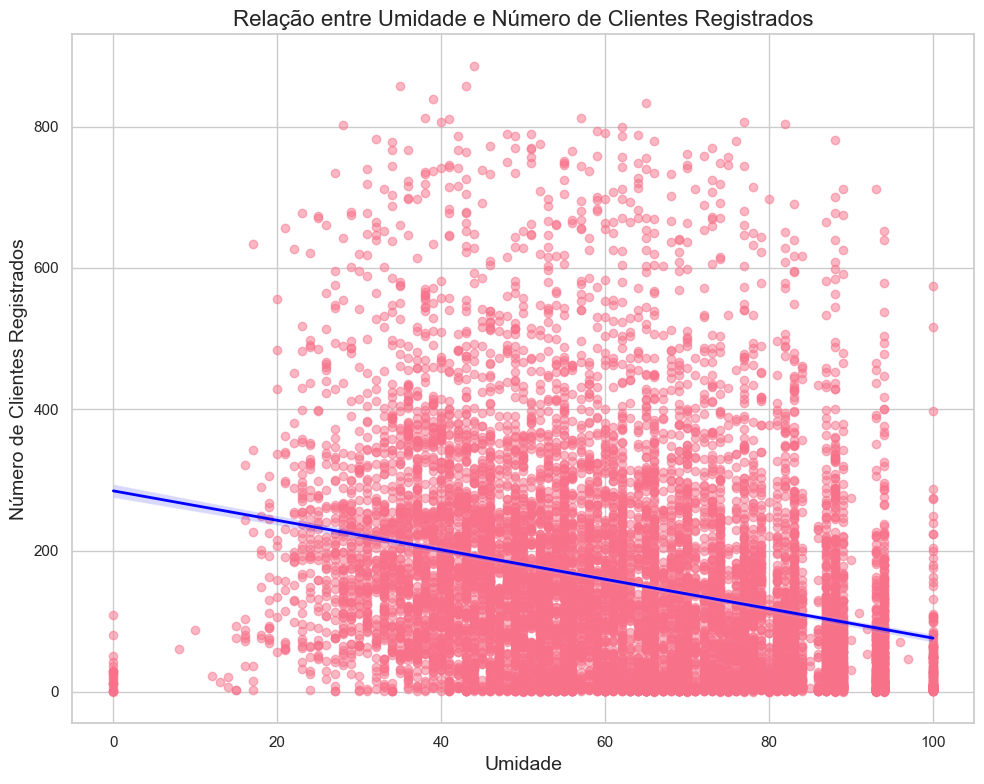

In [79]:
# Ajustando o estilo e paleta de cores do Seaborn
sns.set_theme(style="whitegrid")
sns.set_palette("husl")

# Criando o gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 8))
sns.regplot(data=train, x='humidity', y='registered', scatter_kws={'alpha':0.5}, line_kws={'color':'blue', 'linewidth':2})
plt.title('Relação entre Umidade e Número de Clientes Registrados', fontsize=16)
plt.xlabel('Umidade', fontsize=14)
plt.ylabel('Número de Clientes Registrados', fontsize=14)

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

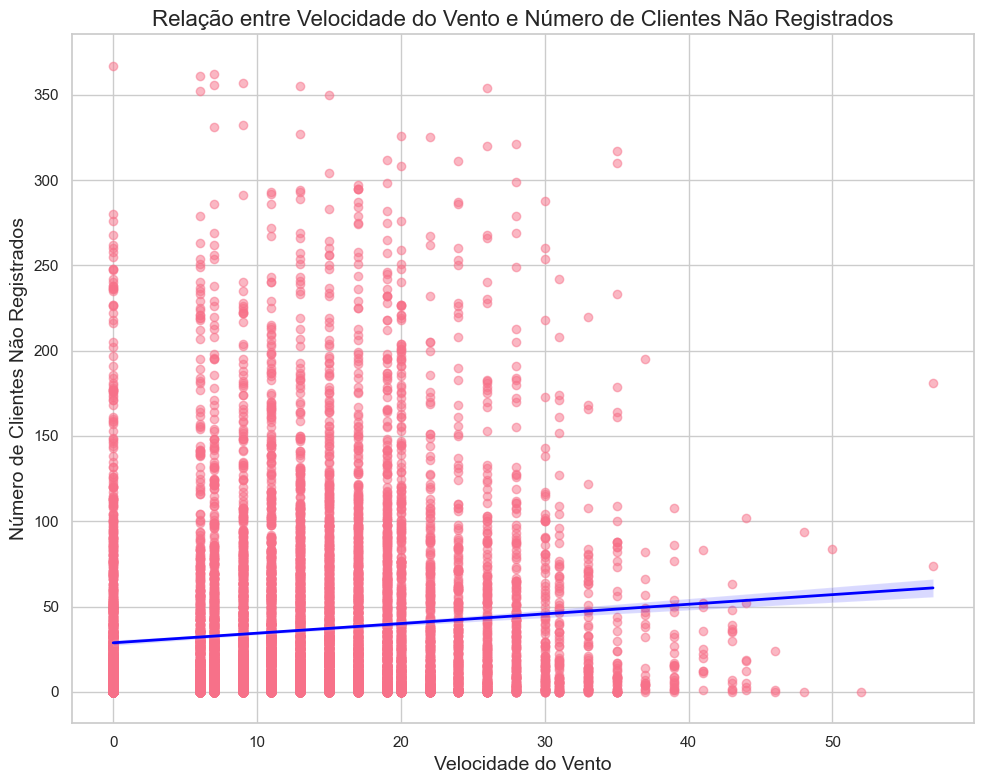

In [80]:
# Ajustando o estilo e paleta de cores do Seaborn
sns.set_theme(style="whitegrid")
sns.set_palette("husl")

# Criando o gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 8))
sns.regplot(data=train, x='windspeed', y='casual', scatter_kws={'alpha':0.5}, line_kws={'color':'blue', 'linewidth':2})
plt.title('Relação entre Velocidade do Vento e Número de Clientes Não Registrados', fontsize=16)
plt.xlabel('Velocidade do Vento', fontsize=14)
plt.ylabel('Número de Clientes Não Registrados', fontsize=14)

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

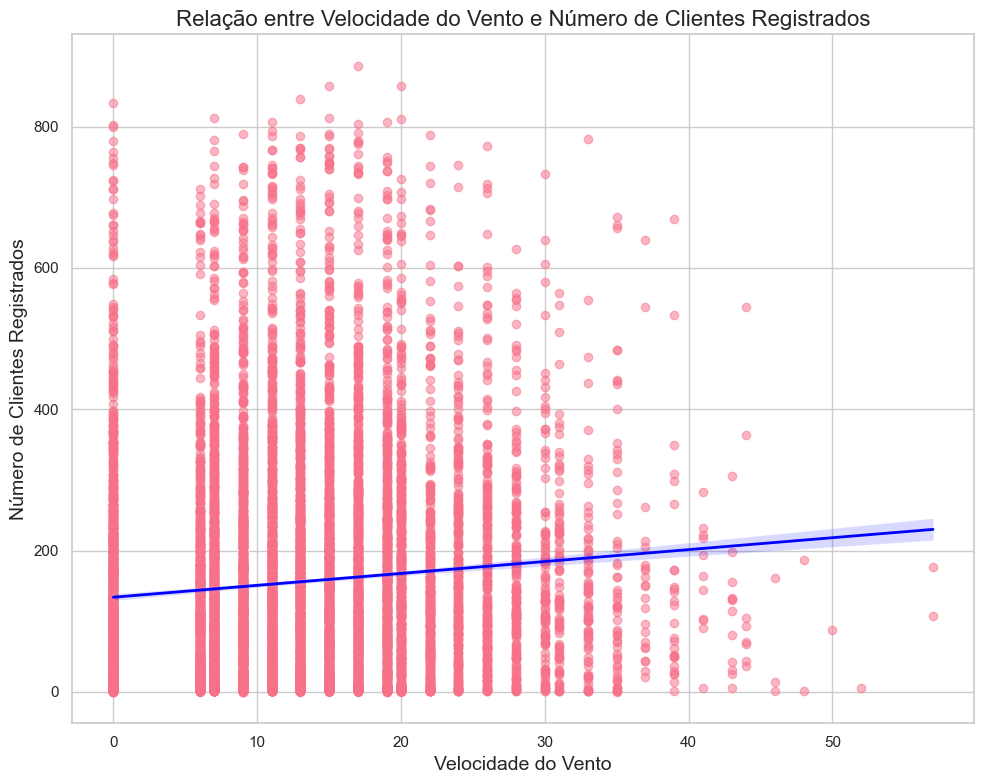

In [81]:
# Ajustando o estilo e paleta de cores do Seaborn
sns.set_theme(style="whitegrid")
sns.set_palette("husl")

# Criando o gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 8))
sns.regplot(data=train, x='windspeed', y='registered', scatter_kws={'alpha':0.5}, line_kws={'color':'blue', 'linewidth':2})
plt.title('Relação entre Velocidade do Vento e Número de Clientes Registrados', fontsize=16)
plt.xlabel('Velocidade do Vento', fontsize=14)
plt.ylabel('Número de Clientes Registrados', fontsize=14)

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

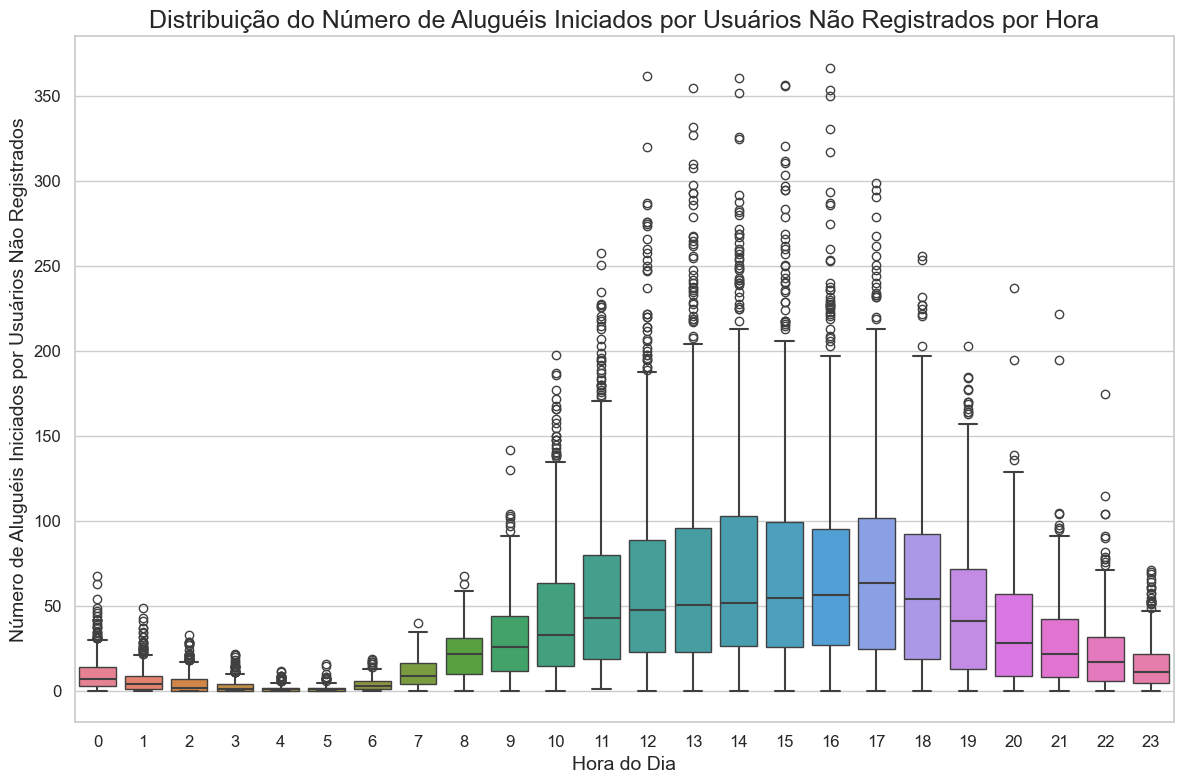

In [102]:
# Ajuste do tamanho da figura
plt.figure(figsize=(12, 8))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 24)

# Boxplot para casual
sns.boxplot(x="hour", y="casual", data=train, hue="hour", palette=palette)

# Título e rótulos dos eixos com ajustes de tamanho de fonte e texto explicativo
plt.title('Distribuição do Número de Aluguéis Iniciados por Usuários Não Registrados por Hora', fontsize=18)
plt.xlabel('Hora do Dia', fontsize=14)
plt.ylabel('Número de Aluguéis Iniciados por Usuários Não Registrados', fontsize=14)

# Ajuste de tamanho de fonte para os rótulos dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuste de espessura das linhas dos boxplots
for line in plt.gca().get_lines():
    line.set_linewidth(1.5)


# Remover legendas duplicadas
plt.legend([],[], frameon=False)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

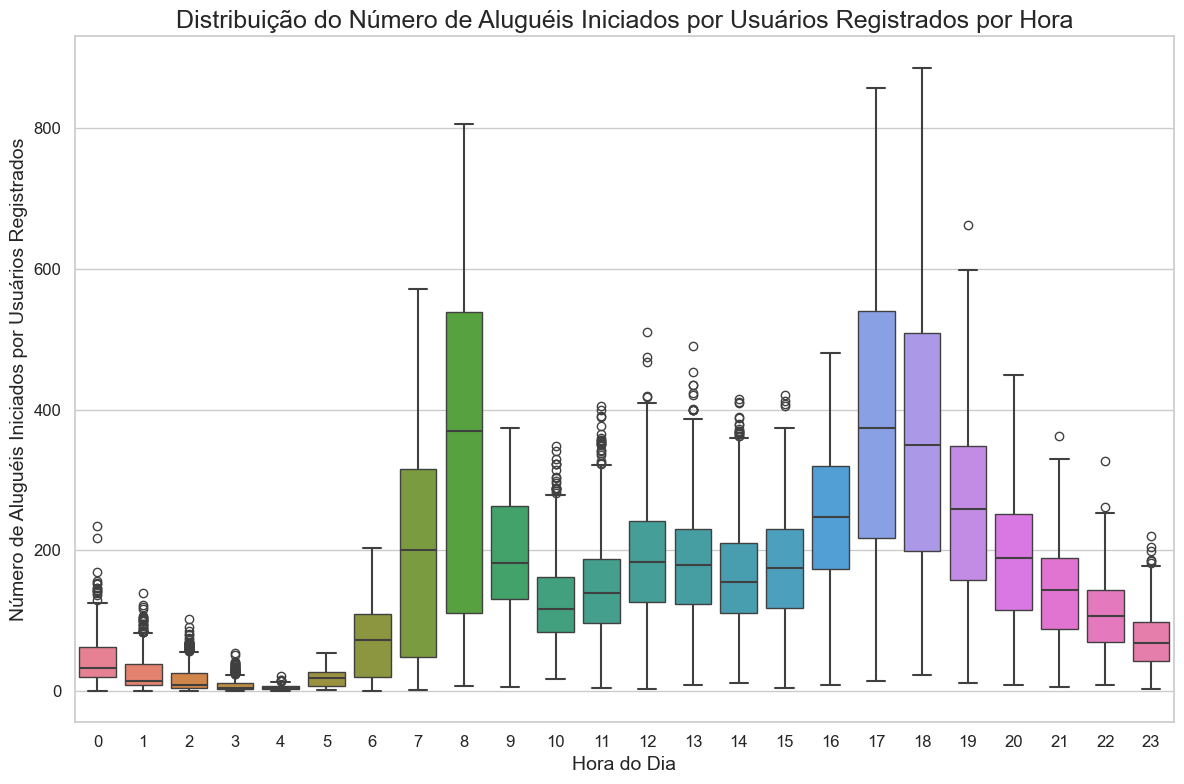

In [103]:
# Ajuste do tamanho da figura
plt.figure(figsize=(12, 8))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 24)

# Boxplot para registered
sns.boxplot(x="hour", y="registered", data=train, hue="hour", palette=palette)

# Título e rótulos dos eixos com ajustes de tamanho de fonte e texto explicativo
plt.title('Distribuição do Número de Aluguéis Iniciados por Usuários Registrados por Hora', fontsize=18)
plt.xlabel('Hora do Dia', fontsize=14)
plt.ylabel('Número de Aluguéis Iniciados por Usuários Registrados', fontsize=14)

# Ajuste de tamanho de fonte para os rótulos dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuste de espessura das linhas dos boxplots
for line in plt.gca().get_lines():
    line.set_linewidth(1.5)

# Remover legendas duplicadas
plt.legend([],[], frameon=False)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

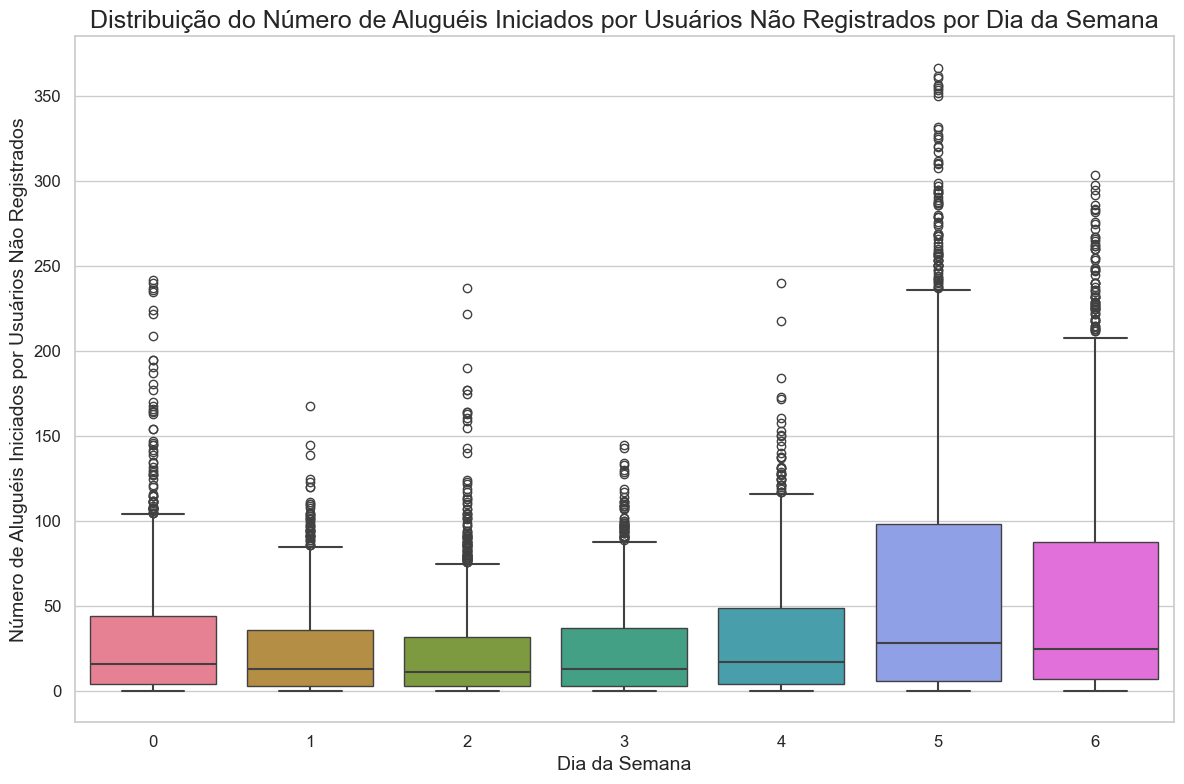

In [105]:
# Ajuste do tamanho da figura
plt.figure(figsize=(12, 8))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 7)

# Boxplot para casual
sns.boxplot(x="day_of_week", y="casual", data=train, hue="day_of_week", palette=palette)

# Título e rótulos dos eixos com ajustes de tamanho de fonte e texto explicativo
plt.title('Distribuição do Número de Aluguéis Iniciados por Usuários Não Registrados por Dia da Semana', fontsize=18)
plt.xlabel('Dia da Semana', fontsize=14)
plt.ylabel('Número de Aluguéis Iniciados por Usuários Não Registrados', fontsize=14)

# Ajuste de tamanho de fonte para os rótulos dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuste de espessura das linhas dos boxplots
for line in plt.gca().get_lines():
    line.set_linewidth(1.5)

# Remover legendas duplicadas
plt.legend([],[], frameon=False)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

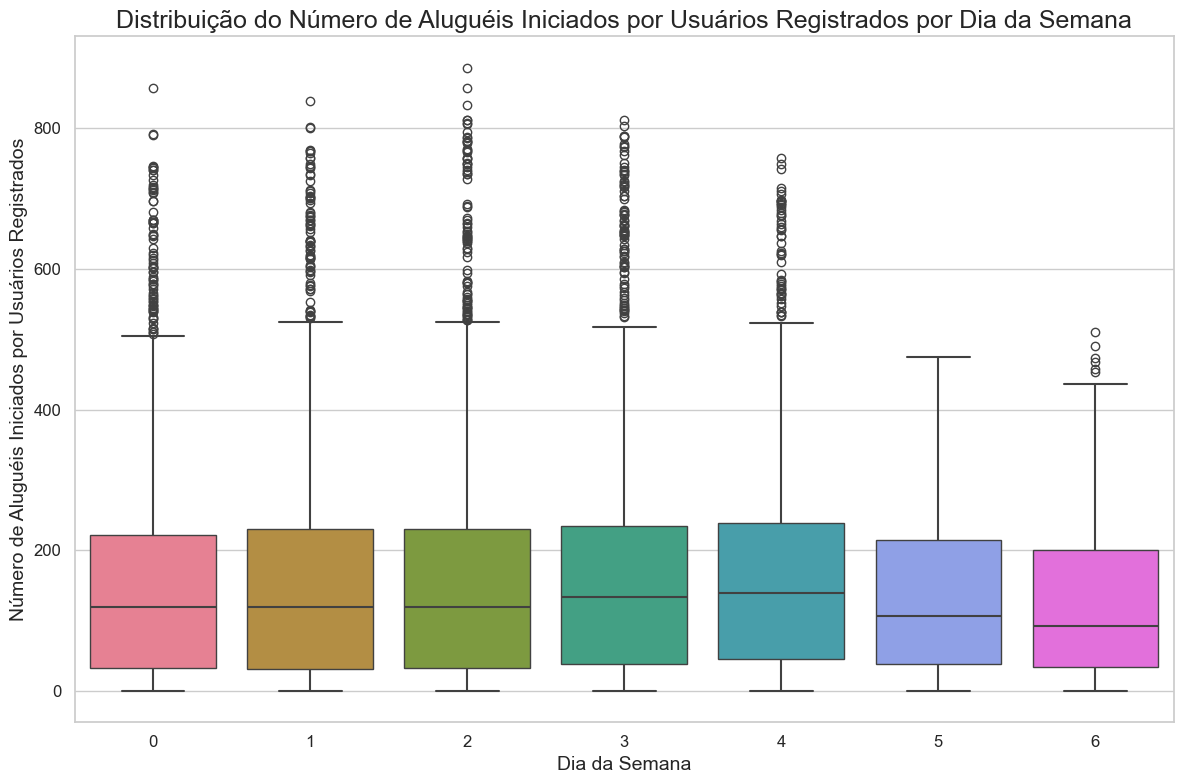

In [106]:
# Ajuste do tamanho da figura
plt.figure(figsize=(12, 8))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 7)

# Boxplot para registered
sns.boxplot(x="day_of_week", y="registered", data=train, hue="day_of_week", palette=palette)

# Título e rótulos dos eixos com ajustes de tamanho de fonte e texto explicativo
plt.title('Distribuição do Número de Aluguéis Iniciados por Usuários Registrados por Dia da Semana', fontsize=18)
plt.xlabel('Dia da Semana', fontsize=14)
plt.ylabel('Número de Aluguéis Iniciados por Usuários Registrados', fontsize=14)

# Ajuste de tamanho de fonte para os rótulos dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuste de espessura das linhas dos boxplots
for line in plt.gca().get_lines():
    line.set_linewidth(1.5)

# Remover legendas duplicadas
plt.legend([],[], frameon=False)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

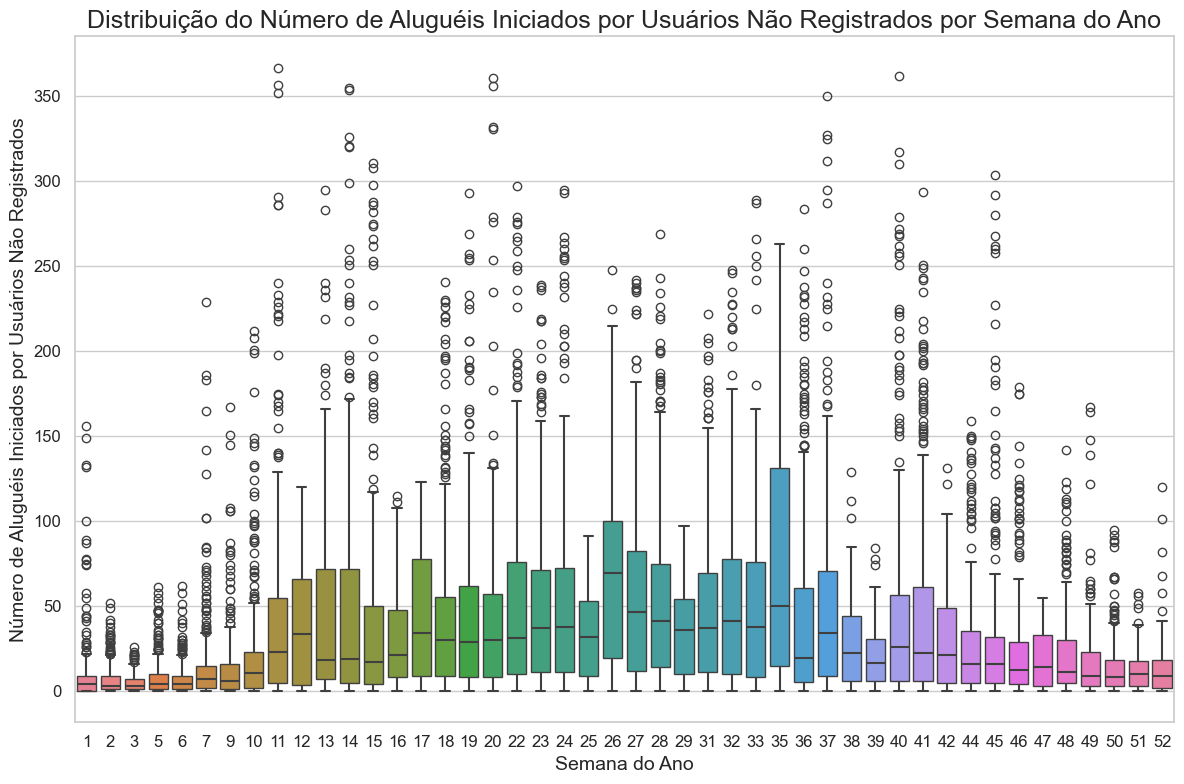

In [109]:
# Ajuste do tamanho da figura
plt.figure(figsize=(12, 8))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 46)

# Boxplot para casual
sns.boxplot(x="week_of_year", y="casual", data=train, hue="week_of_year", palette=palette)

# Título e rótulos dos eixos com ajustes de tamanho de fonte e texto explicativo
plt.title('Distribuição do Número de Aluguéis Iniciados por Usuários Não Registrados por Semana do Ano', fontsize=18)
plt.xlabel('Semana do Ano', fontsize=14)
plt.ylabel('Número de Aluguéis Iniciados por Usuários Não Registrados', fontsize=14)

# Ajuste de tamanho de fonte para os rótulos dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuste de espessura das linhas dos boxplots
for line in plt.gca().get_lines():
    line.set_linewidth(1.5)

# Remover legendas duplicadas
plt.legend([],[], frameon=False)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

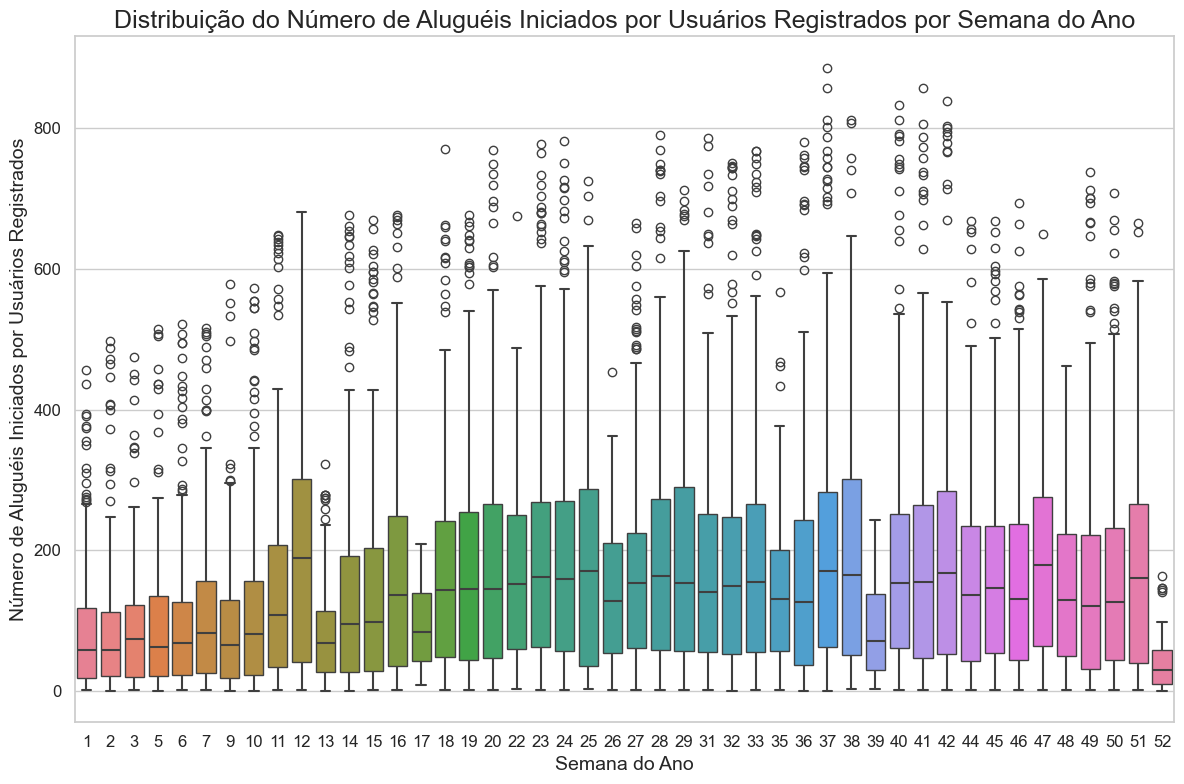

In [110]:
# Ajuste do tamanho da figura
plt.figure(figsize=(12, 8))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 46)

# Boxplot para registered
sns.boxplot(x="week_of_year", y="registered", data=train, hue="week_of_year", palette=palette)

# Título e rótulos dos eixos com ajustes de tamanho de fonte e texto explicativo
plt.title('Distribuição do Número de Aluguéis Iniciados por Usuários Registrados por Semana do Ano', fontsize=18)
plt.xlabel('Semana do Ano', fontsize=14)
plt.ylabel('Número de Aluguéis Iniciados por Usuários Registrados', fontsize=14)

# Ajuste de tamanho de fonte para os rótulos dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuste de espessura das linhas dos boxplots
for line in plt.gca().get_lines():
    line.set_linewidth(1.5)

# Remover legendas duplicadas
plt.legend([],[], frameon=False)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

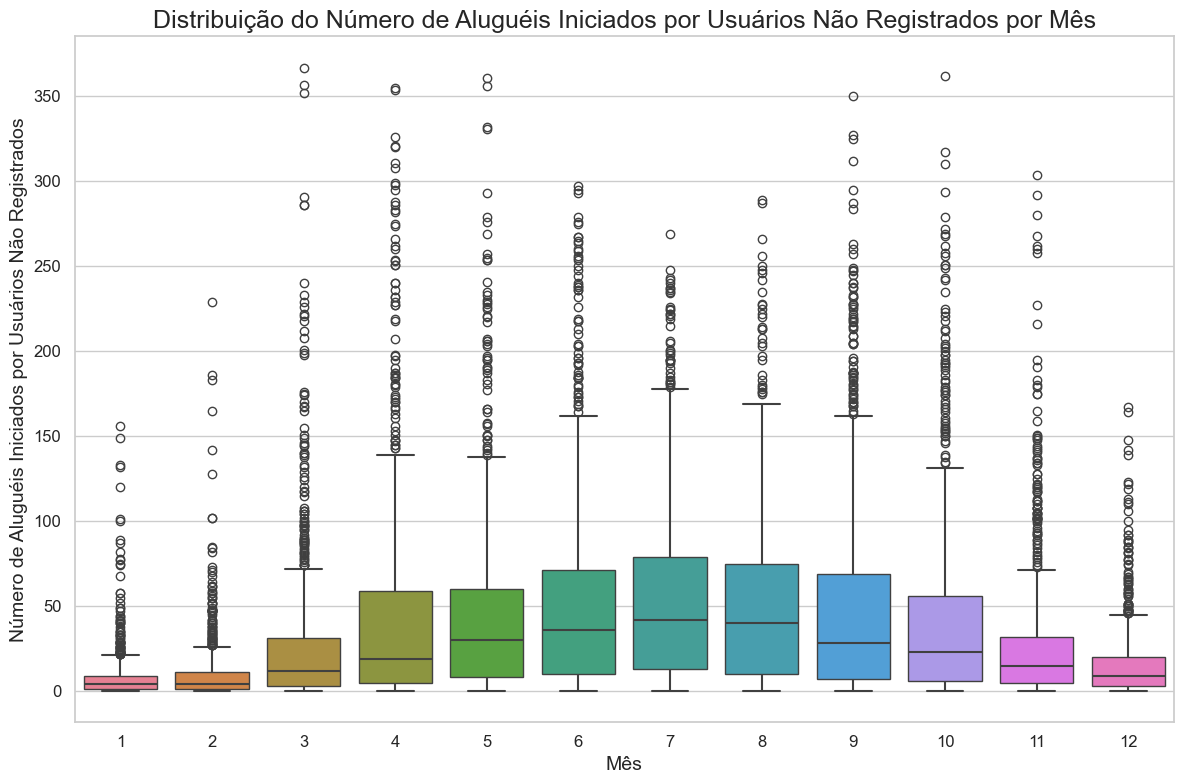

In [111]:
# Ajuste do tamanho da figura
plt.figure(figsize=(12, 8))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 12)

# Boxplot para casual
sns.boxplot(x="month", y="casual", data=train, hue="month", palette=palette)

# Título e rótulos dos eixos com ajustes de tamanho de fonte e texto explicativo
plt.title('Distribuição do Número de Aluguéis Iniciados por Usuários Não Registrados por Mês', fontsize=18)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Número de Aluguéis Iniciados por Usuários Não Registrados', fontsize=14)

# Ajuste de tamanho de fonte para os rótulos dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuste de espessura das linhas dos boxplots
for line in plt.gca().get_lines():
    line.set_linewidth(1.5)

# Remover legendas duplicadas
plt.legend([],[], frameon=False)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

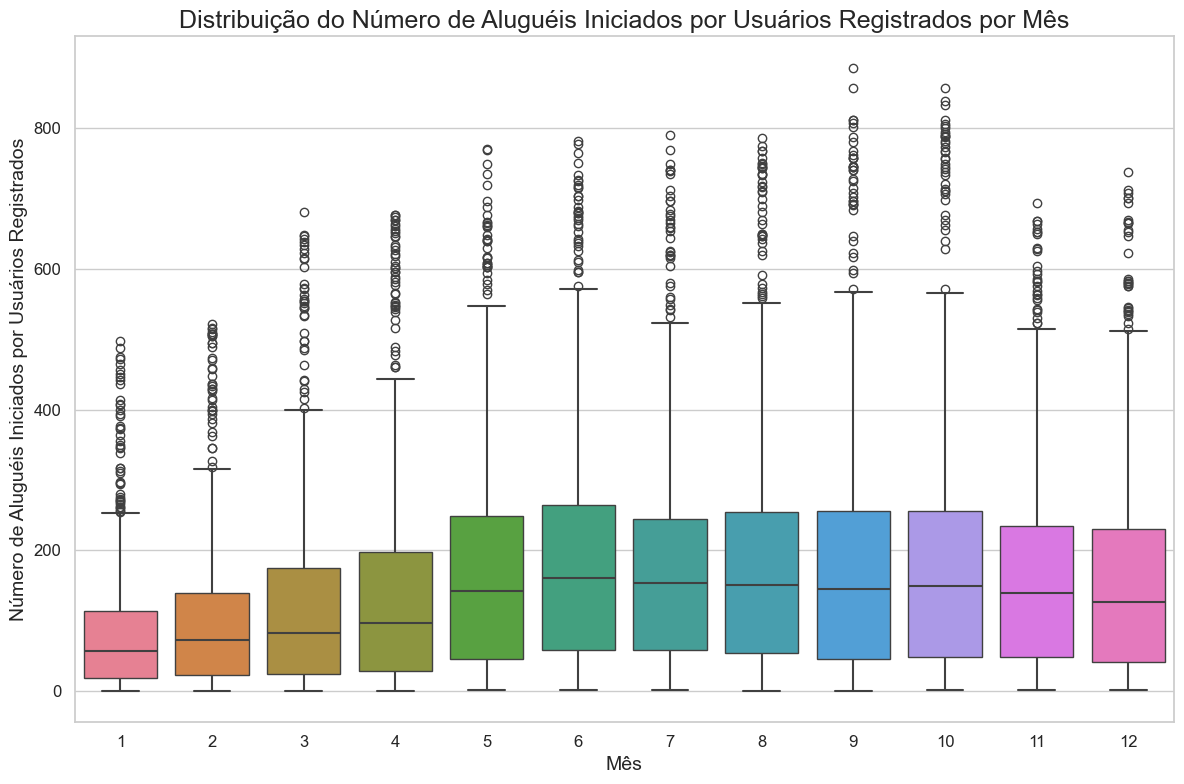

In [112]:
# Ajuste do tamanho da figura
plt.figure(figsize=(12, 8))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 12)

# Boxplot para casual
sns.boxplot(x="month", y="registered", data=train, hue="month", palette=palette)

# Título e rótulos dos eixos com ajustes de tamanho de fonte e texto explicativo
plt.title('Distribuição do Número de Aluguéis Iniciados por Usuários Registrados por Mês', fontsize=18)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Número de Aluguéis Iniciados por Usuários Registrados', fontsize=14)

# Ajuste de tamanho de fonte para os rótulos dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuste de espessura das linhas dos boxplots
for line in plt.gca().get_lines():
    line.set_linewidth(1.5)

# Remover legendas duplicadas
plt.legend([],[], frameon=False)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

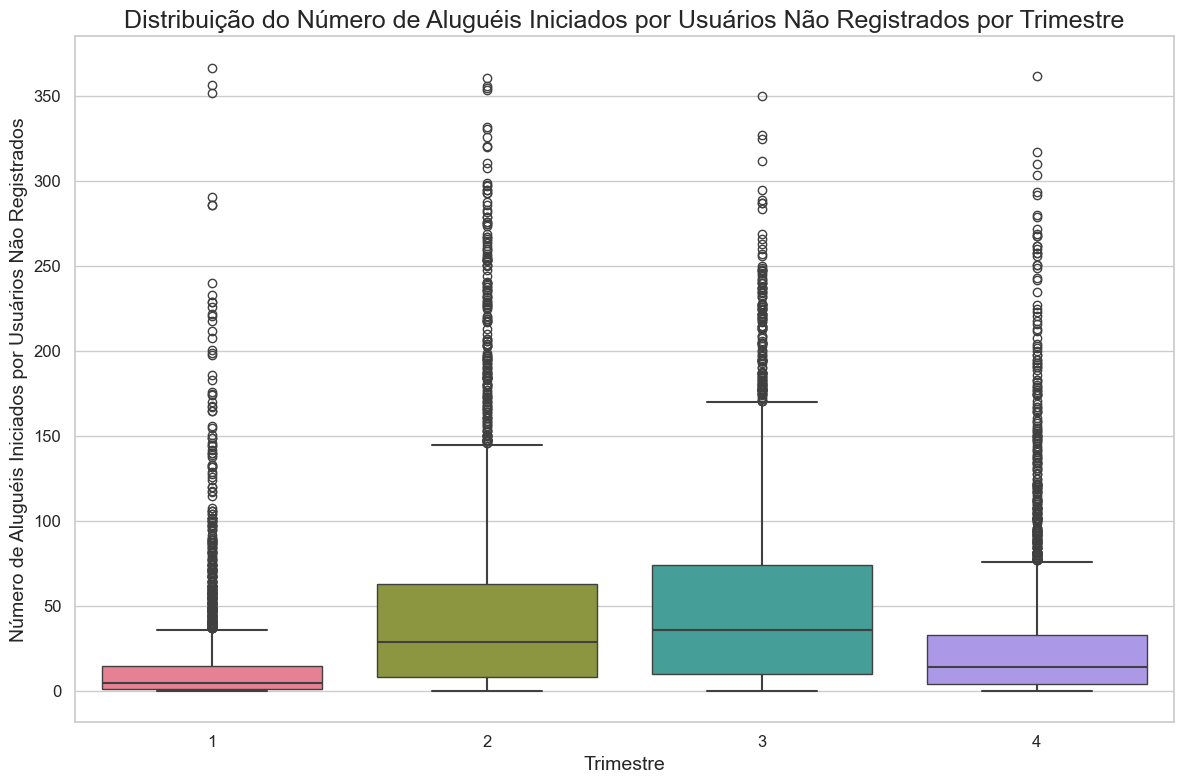

In [113]:
# Ajuste do tamanho da figura
plt.figure(figsize=(12, 8))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 4)

# Boxplot para casual
sns.boxplot(x="quarter", y="casual", data=train, hue="quarter", palette=palette)

# Título e rótulos dos eixos com ajustes de tamanho de fonte e texto explicativo
plt.title('Distribuição do Número de Aluguéis Iniciados por Usuários Não Registrados por Trimestre', fontsize=18)
plt.xlabel('Trimestre', fontsize=14)
plt.ylabel('Número de Aluguéis Iniciados por Usuários Não Registrados', fontsize=14)

# Ajuste de tamanho de fonte para os rótulos dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuste de espessura das linhas dos boxplots
for line in plt.gca().get_lines():
    line.set_linewidth(1.5)

# Remover legendas duplicadas
plt.legend([],[], frameon=False)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

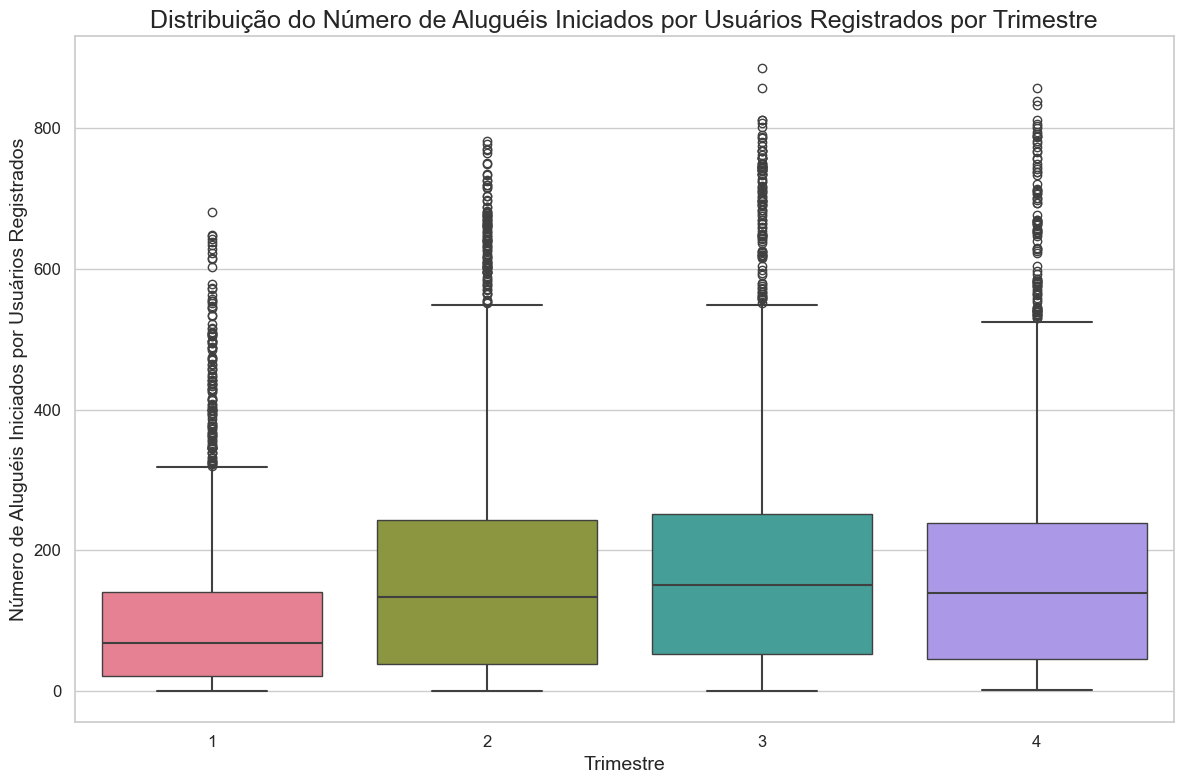

In [114]:
# Ajuste do tamanho da figura
plt.figure(figsize=(12, 8))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 4)

# Boxplot para registered
sns.boxplot(x="quarter", y="registered", data=train, hue="quarter", palette=palette)

# Título e rótulos dos eixos com ajustes de tamanho de fonte e texto explicativo
plt.title('Distribuição do Número de Aluguéis Iniciados por Usuários Registrados por Trimestre', fontsize=18)
plt.xlabel('Trimestre', fontsize=14)
plt.ylabel('Número de Aluguéis Iniciados por Usuários Registrados', fontsize=14)

# Ajuste de tamanho de fonte para os rótulos dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuste de espessura das linhas dos boxplots
for line in plt.gca().get_lines():
    line.set_linewidth(1.5)

# Remover legendas duplicadas
plt.legend([],[], frameon=False)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

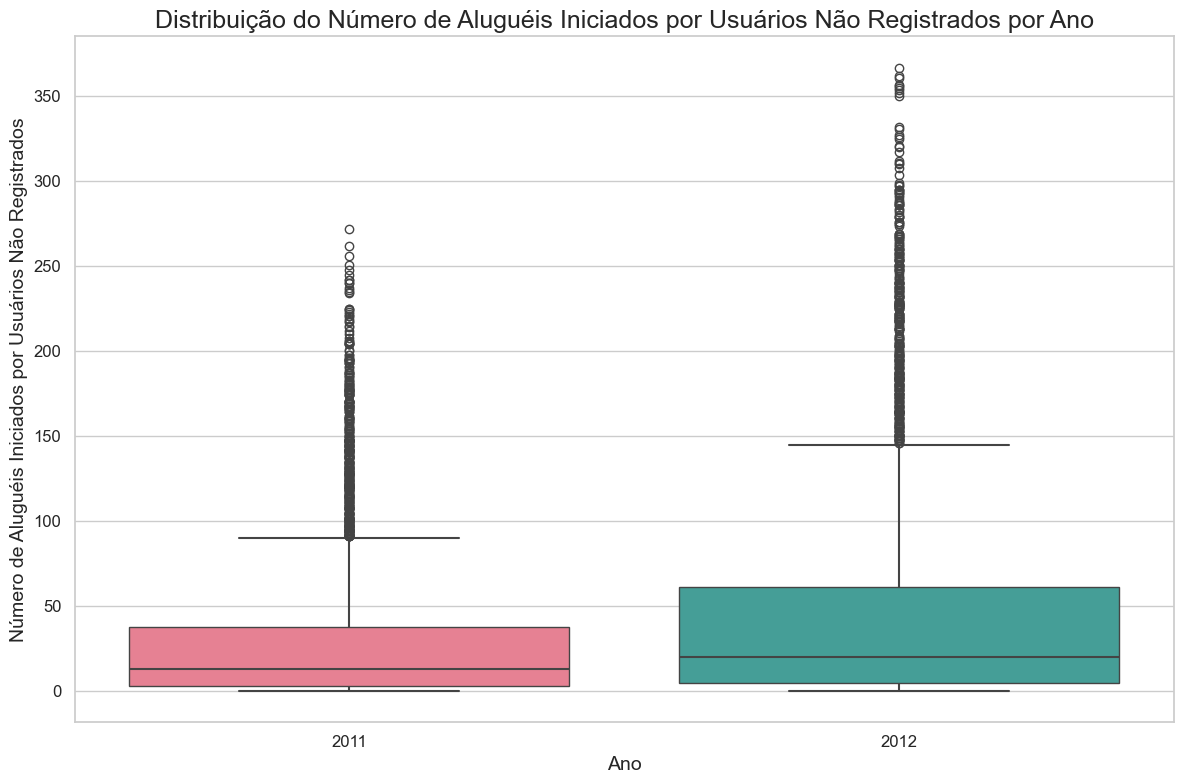

In [116]:
# Ajuste do tamanho da figura
plt.figure(figsize=(12, 8))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 2)

# Boxplot para casual
sns.boxplot(x="year", y="casual", data=train, hue="year", palette=palette)

# Título e rótulos dos eixos com ajustes de tamanho de fonte e texto explicativo
plt.title('Distribuição do Número de Aluguéis Iniciados por Usuários Não Registrados por Ano', fontsize=18)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Número de Aluguéis Iniciados por Usuários Não Registrados', fontsize=14)

# Ajuste de tamanho de fonte para os rótulos dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuste de espessura das linhas dos boxplots
for line in plt.gca().get_lines():
    line.set_linewidth(1.5)

# Remover legendas duplicadas
plt.legend([],[], frameon=False)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

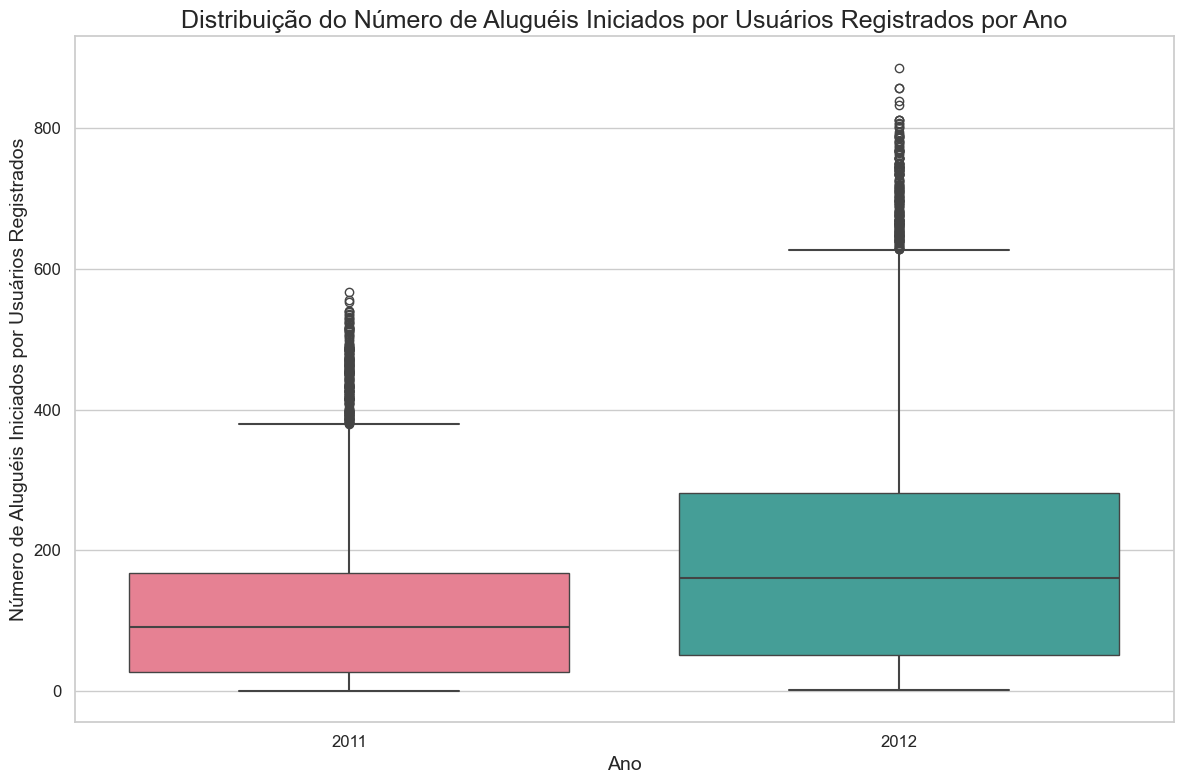

In [117]:
# Ajuste do tamanho da figura
plt.figure(figsize=(12, 8))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 2)

# Boxplot para registered
sns.boxplot(x="year", y="registered", data=train, hue="year", palette=palette)

# Título e rótulos dos eixos com ajustes de tamanho de fonte e texto explicativo
plt.title('Distribuição do Número de Aluguéis Iniciados por Usuários Registrados por Ano', fontsize=18)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Número de Aluguéis Iniciados por Usuários Registrados', fontsize=14)

# Ajuste de tamanho de fonte para os rótulos dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuste de espessura das linhas dos boxplots
for line in plt.gca().get_lines():
    line.set_linewidth(1.5)

# Remover legendas duplicadas
plt.legend([],[], frameon=False)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### 5. Criação dos modelos de previsão

In [94]:
# Separando as tabelas de teste e treino
x_train = train.drop(columns=['datetime', 'casual', 'registered', 'count'])
y_train_casual = train["casual"]

x_train = train.drop(columns=['datetime', 'casual', 'registered', 'count'])
y_train_registered = train["registered"]

x_test = test.drop(columns=['datetime'])

In [95]:
# Para predizer os usuários casuais
casual_dec = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', ExtraTreesRegressor(n_estimators=500, random_state=42))
])
casual_dec.fit(x_train, y_train_casual)

# Para predizer os usuários registrados
registered_dec = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', ExtraTreesRegressor(n_estimators=500, random_state=42))
])
registered_dec.fit(x_train, y_train_registered)

Pipeline(steps=[('scaler', StandardScaler()),
                ('random_forest',
                 ExtraTreesRegressor(n_estimators=500, random_state=42))])

In [96]:
# Predizendo os valores
y_train_casual = casual_dec.predict(x_train).astype(int)
y_train_registered = registered_dec.predict(x_train).astype(int)

# Substituir valores negativos por zero
y_train_casual = np.maximum(y_train_casual, 0)
y_train_registered = np.maximum(y_train_registered, 0)
y_train_pred = y_train_casual + y_train_registered

# Calcular o Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y_true, y_pred):
    log_y_true = np.log1p(y_true)
    log_y_pred = np.log1p(y_pred)
    squared_errors = (log_y_true - log_y_pred) ** 2
    mean_squared_errors = np.mean(squared_errors)
    rmsle = np.sqrt(mean_squared_errors)
    return rmsle

# Calcular o Mean Absolute Error (MAE)
mae = mean_absolute_error(train['count'], y_train_pred)
print("Mean Absolute Error (MAE):", mae)

# Calcular o Mean Squared Error (MSE)
mse = mean_squared_error(train['count'], y_train_pred)
print("Mean Squared Error (MSE):", mse)

# Calcular o Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calcular o Coeficiente de Determinação (R²)
r2 = r2_score(train['count'], y_train_pred)
print("Coefficient of Determination (R²):", r2)

rmsle_value = rmsle(train['count'], y_train_pred)
print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle_value)

Mean Absolute Error (MAE): 0.0012860554841080288
Mean Squared Error (MSE): 0.0012860554841080288
Root Mean Squared Error (RMSE): 0.03586161574870866
Coefficient of Determination (R²): 0.9999999608032988
Root Mean Squared Logarithmic Error (RMSLE): 0.0001011356188070703


### 6. Aplicação dos modelos de previsão nos dados de teste

In [97]:
# Predizendo os valores
y_test_casual = casual_dec.predict(x_test).astype(int)
y_test_registered = registered_dec.predict(x_test).astype(int)

# Substituir valores negativos por zero
y_test_casual = np.maximum(y_test_casual, 0)
y_test_registered = np.maximum(y_test_registered, 0)


In [98]:
# Finalmente a coluna "count"
y_test_count = y_test_casual + y_test_registered

In [99]:
# Criando a tabela de submissão
submited = pd.DataFrame()

submited["datetime"] = test["datetime"]
submited["count"] = y_test_count

submited.set_index("datetime", inplace=True)

In [100]:
submited.head()

count
datetime                  
2011-01-20 00:00:00     10
2011-01-20 01:00:00      4
2011-01-20 02:00:00      3
2011-01-20 03:00:00      1
2011-01-20 04:00:00      2

In [101]:
submited.to_csv("Submission.csv")